## Maryland statewide vehicle crashes

Data Source: https://opendata.maryland.gov/widgets/65du-s3qu


### Motivation: 


### Importing libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

In [74]:
#importing all the libraries that are required for the project 
#using numpy for handling the data in arrays
#using matplotlib for the pie charts, bar graphs etc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import timeit
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from collections import defaultdict
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
#Reading the csv file
vehicle_crashes_data = pd.read_csv("Maryland_Statewide_Vehicle_Crashes.csv", low_memory = False) 

In [4]:
vehicle_crashes_data

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,COLLISION_TYPE_CODE,SURF_COND_DESC,SURF_COND_CODE,LANE_DESC,LANE_CODE,RD_COND_DESC,RD_COND_CODE,RD_DIV_DESC,RD_DIV_CODE,FIX_OBJ_DESC,FIX_OBJ_CODE,REPORT_NO,REPORT_TYPE,WEATHER_DESC,WEATHER_CODE,ACC_DATE,ACC_TIME,LOC_CODE,SIGNAL_FLAG_DESC,SIGNAL_FLAG,C_M_ZONE_FLAG,AGENCY_CODE,AREA_CODE,HARM_EVENT_DESC1,HARM_EVENT_CODE1,HARM_EVENT_DESC2,HARM_EVENT_CODE2,RTE_NO,ROUTE_TYPE_CODE,RTE_SUFFIX,LOG_MILE,LOGMILE_DIR_FLAG_DESC,LOGMILE_DIR_FLAG,MAINROAD_NAME,DISTANCE,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,Other,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,AE58770052,Property Damage Crash,Not Applicable,0.00,20200618,15:15:00,NaN,No,N,N,BACOPD,UNK,Parked Vehicle,2.00,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,1.00,Other,88,Dry,2.0,Left Turn Lane,2.0,No Defects,1.0,One-way Trafficway,2.00,Other Pole,10.0,ADJ984001J,Injury Crash,NaN,7.01,20200430,06:39:00,1003,Yes,Y,N,BALTIMORE,UNK,Other Vehicle,1.00,Other Vehicle,1.0,NaN,NaN,NaN,0.00,NaN,NaN,CHARLES STREET,2.00,Miles,M,N,NaN,NaN,NaN,NORTH AVE,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431)
2,2020,Q2,Daylight,1.00,Montgomery,15.0,NaN,NaN,NaN,NaN,Other,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,EJ7878001D,Injury Crash,NaN,6.01,20200504,09:46:00,54222,No,N,N,GAITHERSBURG,UNK,Pedestrian,3.00,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.140680,-77.193413,POINT (-77.193412729561 39.140680249069)
3,2017,Q2,Daylight,1.00,Baltimore City,24.0,NaN,NaN,NaN,NaN,Single Vehicle,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,ADI7910042,Injury Crash,Other,88.00,20170507,10:39:00,CAD#0830,Yes,Y,N,BALTIMORE,UNK,NaN,3.00,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.282928,-76.635215,POINT (-76.6352150952347 39.2829284750108)
4,2020,Q2,Daylight,1.00,Cecil,7.0,NaN,NaN,NaN,NaN,Same Direction Rear End,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,MSP6709008R,Property Damage Crash,NaN,6.01,20200414,17:32:00,NaN,No,N,N,MSP,UNK,Other Vehicle,1.00,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.611028,-75.951314,POINT (-75.951314 39.611027833333)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771140,2021,Q4,NaN,5.02,Prince George's,16.0,NaN,0.0,Not Applicable,0.00,Same Direction Sideswipe,7,Dry,2.0,Right Turn Lane,1.0,No Defects,1.0,"Two-way, Divided, Positive Median Barrier",4.00,Not Applicable,0.0,MSP7221007L,Injury Crash,NaN,6.01,20211207,06:10:00,NaN,No,N,N,MSP,UNK,Other Vehicle,1.00,Not Applicable,0.0,50.0,US,NaN,0.50,East,E,JOHN HANSON HWY,0.25,Miles,M,E,201.0,MD,NaN,KENILWORTH AVE,38.917184,-76.925309,POINT (-76.925308968694 38.917183558625)
771141,2021,Q4,Dark No Lights,4.00,Montgomery,15.0,NaN,0.0,Not Applicable,0.00,Same Direction Rear End,3,Wet,1.0,Deceleration Lane,4.0,No Defects,1.0,"Two-way, Divided, Positive Median Barrier",4.00,Not Applicable,0.0,MSP71450078,Property Damage Crash,Raining,3.00,20211230,04:40:00,00,No,N,N,MSP,UNK,Other Vehicle,1.00,Not Applicable,0.0,495.0,IS,NaN,2.37,East,E,CAPITAL BELTWAY,0.00,Miles,M,W,190.0,MD,NaN,RIVER RD,38.993500,-77.157749,POINT (-77.157748869278 38.993499793853)
771142,2021,Q4,Daylight,1.00,Baltimore,3.0,NaN,0.0,Non Intersection,1.00,Same Direction Sideswipe,7,Wet,1.0,Left Turn Lane,2.0,No Defects,1.0,NaN,5.01,Not Applicable,0.0,AE58540044,Property Damage Crash,Raining,3.00,20211029,11:40:00,Na

In [5]:
#Printing the first five rows
vehicle_crashes_data.head()

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,COLLISION_TYPE_CODE,SURF_COND_DESC,SURF_COND_CODE,LANE_DESC,LANE_CODE,RD_COND_DESC,RD_COND_CODE,RD_DIV_DESC,RD_DIV_CODE,FIX_OBJ_DESC,FIX_OBJ_CODE,REPORT_NO,REPORT_TYPE,WEATHER_DESC,WEATHER_CODE,ACC_DATE,ACC_TIME,LOC_CODE,SIGNAL_FLAG_DESC,SIGNAL_FLAG,C_M_ZONE_FLAG,AGENCY_CODE,AREA_CODE,HARM_EVENT_DESC1,HARM_EVENT_CODE1,HARM_EVENT_DESC2,HARM_EVENT_CODE2,RTE_NO,ROUTE_TYPE_CODE,RTE_SUFFIX,LOG_MILE,LOGMILE_DIR_FLAG_DESC,LOGMILE_DIR_FLAG,MAINROAD_NAME,DISTANCE,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,Other,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,AE58770052,Property Damage Crash,Not Applicable,0.00,20200618,15:15:00,NaN,No,N,N,BACOPD,UNK,Parked Vehicle,2.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,1.0,Other,88,Dry,2.0,Left Turn Lane,2.0,No Defects,1.0,One-way Trafficway,2.0,Other Pole,10.0,ADJ984001J,Injury Crash,NaN,7.01,20200430,06:39:00,1003,Yes,Y,N,BALTIMORE,UNK,Other Vehicle,1.0,Other Vehicle,1.0,NaN,NaN,NaN,0.0,NaN,NaN,CHARLES STREET,2.0,Miles,M,N,NaN,NaN,NaN,NORTH AVE,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431)
2,2020,Q2,Daylight,1.00,Montgomery,15.0,NaN,NaN,NaN,NaN,Other,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,EJ7878001D,Injury Crash,NaN,6.01,20200504,09:46:00,54222,No,N,N,GAITHERSBURG,UNK,Pedestrian,3.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.140680,-77.193413,POINT (-77.193412729561 39.140680249069)
3,2017,Q2,Daylight,1.00,Baltimore City,24.0,NaN,NaN,NaN,NaN,Single Vehicle,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,ADI7910042,Injury Crash,Other,88.00,20170507,10:39:00,CAD#0830,Yes,Y,N,BALTIMORE,UNK,NaN,3.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.282928,-76.635215,POINT (-76.6352150952347 39.2829284750108)
4,2020,Q2,Daylight,1.00,Cecil,7.0,NaN,NaN,NaN,NaN,Same Direction Rear End,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,MSP6709008R,Property Damage Crash,NaN,6.01,20200414,17:32:00,NaN,No,N,N,MSP,UNK,Other Vehicle,1.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.611028,-75.951314,POINT (-75.951314 39.611027833333)


In [6]:
#printing the last five rows
vehicle_crashes_data.tail()

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,COLLISION_TYPE_CODE,SURF_COND_DESC,SURF_COND_CODE,LANE_DESC,LANE_CODE,RD_COND_DESC,RD_COND_CODE,RD_DIV_DESC,RD_DIV_CODE,FIX_OBJ_DESC,FIX_OBJ_CODE,REPORT_NO,REPORT_TYPE,WEATHER_DESC,WEATHER_CODE,ACC_DATE,ACC_TIME,LOC_CODE,SIGNAL_FLAG_DESC,SIGNAL_FLAG,C_M_ZONE_FLAG,AGENCY_CODE,AREA_CODE,HARM_EVENT_DESC1,HARM_EVENT_CODE1,HARM_EVENT_DESC2,HARM_EVENT_CODE2,RTE_NO,ROUTE_TYPE_CODE,RTE_SUFFIX,LOG_MILE,LOGMILE_DIR_FLAG_DESC,LOGMILE_DIR_FLAG,MAINROAD_NAME,DISTANCE,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
771140,2021,Q4,NaN,5.02,Prince George's,16.0,NaN,0.0,Not Applicable,0.00,Same Direction Sideswipe,7,Dry,2.0,Right Turn Lane,1.0,No Defects,1.0,"Two-way, Divided, Positive Median Barrier",4.00,Not Applicable,0.0,MSP7221007L,Injury Crash,NaN,6.01,20211207,06:10:00,NaN,No,N,N,MSP,UNK,Other Vehicle,1.00,Not Applicable,0.0,50.0,US,NaN,0.50,East,E,JOHN HANSON HWY,0.25,Miles,M,E,201.0,MD,NaN,KENILWORTH AVE,38.917184,-76.925309,POINT (-76.925308968694 38.917183558625)
771141,2021,Q4,Dark No Lights,4.00,Montgomery,15.0,NaN,0.0,Not Applicable,0.00,Same Direction Rear End,3,Wet,1.0,Deceleration Lane,4.0,No Defects,1.0,"Two-way, Divided, Positive Median Barrier",4.00,Not Applicable,0.0,MSP71450078,Property Damage Crash,Raining,3.00,20211230,04:40:00,00,No,N,N,MSP,UNK,Other Vehicle,1.00,Not Applicable,0.0,495.0,IS,NaN,2.37,East,E,CAPITAL BELTWAY,0.00,Miles,M,W,190.0,MD,NaN,RIVER RD,38.993500,-77.157749,POINT (-77.157748869278 38.993499793853)
771142,2021,Q4,Daylight,1.00,Baltimore,3.0,NaN,0.0,Non Intersection,1.00,Same Direction Sideswipe,7,Wet,1.0,Left Turn Lane,2.0,No Defects,1.0,NaN,5.01,Not Applicable,0.0,AE58540044,Property Damage Crash,Raining,3.00,20211029,11:40:00,NaN,No,N,N,BACOPD,UNK,Other Vehicle,1.00,Not Applicable,0.0,4967.0,CO,NaN,0.76,South,S,BACK RIVER NECK RD,50.00,Feet,F,S,4875.0,CO,NaN,MIDDLEBOROUGH RD,39.304732,-76.441141,POINT (-76.441140820424 39.304732332716)
771143,2021,Q4,NaN,7.88,Wicomico,22.0,NaN,0.0,Non Intersection,1.00,Same Direction Rear End,3,Wet,1.0,Right Turn Lane,1.0,No Defects,1.0,"Two-way, Not Divided",1.00,Not Applicable,0.0,MSP6929004L,Property Damage Crash,Raining,3.00,20211231,21:07:00,NaN,No,N,N,MSP,UNK,Other Vehicle,1.00,Not Applicable,0.0,349.0,MD,NaN,19.60,East,E,NANTICOKE RD,0.00,Miles,M,W,1026.0,CO,NaN,WESTBROOKE DR,38.305915,-75.531587,POINT (-75.531586844603 38.305914776967)
771144,2021,Q4,NaN,6.02,Anne Arundel,2.0,NaN,0.0,NaN,5.01,Single Vehicle,17,Dry,2.0,Right Turn Lane,1.0,No Defects,1.0,"Two-way, Divided, Positive Median Barrier",4.00,Not Applicable,0.0,MSP659400KS,Injury Crash,NaN,7.01,20211030,18:00:00,NaN,No,N,N,MSP,UNK,Fell Jumped from Motor Vehicle,22.15,Not Applicable,0.0,97.0,IS,NaN,13.81,North,N,NO NAME,20.00,Feet,F,N,97.0,RP,NaN,RAMP 5 FR IS 97 SB TO MD 100 EB,39.154510,-76.648471,POINT (-76.648470641409 39.154509963788)


### Description of columns
**YEAR**               - Values are from 2016 - 2021 \
**QUARTER**            - Values of four quarters Q1 to Q4\
**LIGHT_DESC**         - Description of light of the day like Daylight, dark, dark no lights, etc.\
**LIGHT_CODE**         - Numerical representation of LIGHT_DESC column.\
**COUNTY_DESC**        - Counties list like Baltimore, Baltimore city, etc.\
**COUNTY_NO**          - Numerical representation of COUNTY_DESC column.\
**MUNI_DESC**          - This column is ambigous, it contains only null values and not clear about this column.\
**MUNI_CODE**          - Numerical representation of MUNI_DESC column.\
**JUNCTION_DESC**      - Describes the type of junction at the time of crash like Two-way junction, etc.\
**JUNCTION_CODE**      - Numerical representation of JUNCTION_DESC column.\
**COLLISION_TYPE_DESC**- Describes how collision occured.\
**COLLISION_TYPE_CODE**- Numerical representation of COLLISION_TYPE_DESC column.\
**SURF_COND_DESC**     - Describes the surface condition of the road at the time of accident like Dry, wet, etc.\
**SURF_COND_CODE**     - Numerical representation of SURF_COND_DESC column.\
**LANE_DESC**          - Describes the type of lane like left lane, right lane, etc.\
**LANE_CODE**          - Numerical representation of LANE_DESC column.\
**RD_COND_DESC**       - Describes the condition of road like it contains any defects or no defects. \
**RD_COND_CODE**       - Numerical representation of RD_COND_DESC column.\
**RD_DIV_DESC**        - Describes how the road is divided like one way, two-way, etc.\
**RD_DIV_CODE**        - Numerical representation of RD_DIV_DESC column.\
**FIX_OBJ_DESC**       - Describes the property near the accident or the property that damaged due to the accident.\
**FIX_OBJ_CODE**       - Numerical representation of FIX_OBJ_DESC column.\
**REPORT_NO**          - It is the unique number, it represents file of each accident.\
**REPORT_TYPE**        - Represents the type of accident like property damage or injury crash or fatal crash.\
**WEATHER_DESC**       - Describes the weather condition.\
**WEATHER_CODE**       - Numerical representation of WEATHER_DESC column.\
**ACC_DATE**           - Accident date\
**ACC_TIME**           - Accident time\
**LOC_CODE**           - Location code represents each county\
**SIGNAL_FLAG_DESC**   - Direction flag like north, west, east, south.\
**SIGNAL_FLAG**        - Shortforms of SIGNAL_FLAG_DESC.\
**C_M_ZONE_FLAG**      - Contains two values N and Y.\
**AGENCY_CODE**        - Agency code of counties.\
**AREA_CODE**          - Area code of counties.\
**HARM_EVENT_DESC1**   - Describing cause of accident.\
**HARM_EVENT_CODE1**   - Numerical representation of HARM_EVENT_DESC1 column.\
**HARM_EVENT_DESC2**   - Describing cause of accident.\
**HARM_EVENT_CODE2**   - Numerical representation of HARM_EVENT_DESC2 column.\
**RTE_NO**               - Route number.\
**ROUTE_TYPE_CODE**      - Short form counties.\
**RTE_SUFFIX**           - No description for this column, it contains null values.\
**LOG_MILE**             - Distance from the accident to near by survey zone.\
**LOGMILE_DIR_FLAG_DESC** - Direction of which accident occured.\
**LOGMILE_DIR_FLAG**      - Short form of LOGMILE_DIR_FLAG_DESC.\
**MAINROAD_NAME**         - Mainroad name at which accident occurred.\
**DISTANCE**              - Distance.\
**FEET_MILES_FLAG_DESC**  - Feet or miles flags description\
**FEET_MILES_FLAG**       - Shortforms of FEET_MILES_FLAG_DESC \
**DISTANCE_DIR_FLAG**     - Distance direction flags like N,S, W, E.\
**REFERENCE_NO**          - Reference number.\
**REFERENCE_TYPE_CODE**   - Reference number type code.\
**REFERENCE_SUFFIX**      - It is a null values column.\
**REFERENCE_ROAD_NAME**   - Reference road name to locate the point of accident.\
**LATITUDE**            - Latitude points.\
**LONGITUDE**           - Longitude points.\
**LOCATION**            - combination of latitude and longitude points.

In [7]:
## Concise summary of a DataFrame.
##  info related to datatypes, null value etc
vehicle_crashes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771145 entries, 0 to 771144
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   771145 non-null  int64  
 1   QUARTER                771145 non-null  object 
 2   LIGHT_DESC             741125 non-null  object 
 3   LIGHT_CODE             771145 non-null  float64
 4   COUNTY_DESC            771136 non-null  object 
 5   COUNTY_NO              771136 non-null  float64
 6   MUNI_DESC              0 non-null       float64
 7   MUNI_CODE              574331 non-null  float64
 8   JUNCTION_DESC          667900 non-null  object 
 9   JUNCTION_CODE          694104 non-null  float64
 10  COLLISION_TYPE_DESC    771145 non-null  object 
 11  COLLISION_TYPE_CODE    771145 non-null  int64  
 12  SURF_COND_DESC         691927 non-null  object 
 13  SURF_COND_CODE         694104 non-null  float64
 14  LANE_DESC              585745 non-nu

In [8]:
#dataframe shape
vehicle_crashes_data.shape

(771145, 56)

In [9]:
#printing the column names
vehicle_crashes_data.columns

Index(['YEAR', 'QUARTER', 'LIGHT_DESC', 'LIGHT_CODE', 'COUNTY_DESC', 'COUNTY_NO', 'MUNI_DESC',
       'MUNI_CODE', 'JUNCTION_DESC', 'JUNCTION_CODE', 'COLLISION_TYPE_DESC', 'COLLISION_TYPE_CODE',
       'SURF_COND_DESC', 'SURF_COND_CODE', 'LANE_DESC', 'LANE_CODE', 'RD_COND_DESC',
       'RD_COND_CODE', 'RD_DIV_DESC', 'RD_DIV_CODE', 'FIX_OBJ_DESC', 'FIX_OBJ_CODE', 'REPORT_NO',
       'REPORT_TYPE', 'WEATHER_DESC', 'WEATHER_CODE', 'ACC_DATE', 'ACC_TIME', 'LOC_CODE',
       'SIGNAL_FLAG_DESC', 'SIGNAL_FLAG', 'C_M_ZONE_FLAG', 'AGENCY_CODE', 'AREA_CODE',
       'HARM_EVENT_DESC1', 'HARM_EVENT_CODE1', 'HARM_EVENT_DESC2', 'HARM_EVENT_CODE2', 'RTE_NO',
       'ROUTE_TYPE_CODE', 'RTE_SUFFIX', 'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC', 'LOGMILE_DIR_FLAG',
       'MAINROAD_NAME', 'DISTANCE', 'FEET_MILES_FLAG_DESC', 'FEET_MILES_FLAG', 'DISTANCE_DIR_FLAG',
       'REFERENCE_NO', 'REFERENCE_TYPE_CODE', 'REFERENCE_SUFFIX', 'REFERENCE_ROAD_NAME',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='obje

# Dealing with NULL values

In [10]:
#checking for the duplicated data
vehicle_crashes_data.duplicated().value_counts()

False    771145
dtype: int64

In [11]:
#Looking at the Null values 
vehicle_crashes_data.isnull().sum()

YEAR                          0
QUARTER                       0
LIGHT_DESC                30020
LIGHT_CODE                    0
COUNTY_DESC                   9
COUNTY_NO                     9
MUNI_DESC                771145
MUNI_CODE                196814
JUNCTION_DESC            103245
JUNCTION_CODE             77041
COLLISION_TYPE_DESC           0
COLLISION_TYPE_CODE           0
SURF_COND_DESC            79218
SURF_COND_CODE            77041
LANE_DESC                185400
LANE_CODE                185392
RD_COND_DESC              77041
RD_COND_CODE              77041
RD_DIV_DESC               81181
RD_DIV_CODE               77041
FIX_OBJ_DESC              41273
FIX_OBJ_CODE                  0
REPORT_NO                     0
REPORT_TYPE              110733
WEATHER_DESC             346675
WEATHER_CODE                  0
ACC_DATE                      0
ACC_TIME                      0
LOC_CODE                 414567
SIGNAL_FLAG_DESC              0
SIGNAL_FLAG                   0
C_M_ZONE

There are three columns that contains only null values like MUNI_DESC, RTE_SUFFIX, REFERENCE_SUFFIX. These columns neither give any information about the accident nor useful for modeling. As MUNI_DESC column doesn't give any information for the modeling, the MUNI_CODE which is numerical representation of MUNI_DESC also give no information.Hence dropping them from the dataframe.

In [12]:
#dropping the columns that have major null values
vehicle_crashes_data.drop(['MUNI_DESC','MUNI_CODE','RTE_SUFFIX','REFERENCE_SUFFIX'], axis = 'columns',inplace=True)

In the AREA_CODE column it looks like it doesnt contain any missing values but the column contains unknown values which is not at all useful for the modeling and we couldnt get any insights from that particular column, hence I am dropping AREA_CODE column.

In [13]:
vehicle_crashes_data['AREA_CODE'].value_counts()

UNK    771145
Name: AREA_CODE, dtype: int64

There are some unnecessary columns like 'MAINROAD_NAME','REFERENCE_ROAD_NAME','LOCATION','REPORT_NO','LOC_CODE','REFERENCE_TYPE_CODE','AGENCY_CODE','ROUTE_TYPE_CODE'. These columns just gives the information about the location of the accident but not useful for the further processing of the model. Hence dropping those columns.

In [14]:
#dropping the columns that have major null values
vehicle_crashes_data.drop(['AREA_CODE','MAINROAD_NAME','REFERENCE_ROAD_NAME','LOCATION',
                           'REPORT_NO','LOC_CODE','REFERENCE_TYPE_CODE','AGENCY_CODE','ROUTE_TYPE_CODE'], axis = 'columns',inplace=True)


### HANDLING TARGET VARIABLE

REPORT_TYPE is considered as target variable. The target variable contains 'Property Damage Crash', 'Injury Crash', 'Fatal Crash' as a different classes. Fatal crash is almost similar to Injury crash. Fatal crash values are very few. I want to use binary variables for classification.

In [15]:
#Checking the null values in the target variables and droping them 
vehicle_crashes_data = vehicle_crashes_data.dropna(subset = ['REPORT_TYPE'])

In [16]:
vehicle_crashes_data['REPORT_TYPE'] = vehicle_crashes_data['REPORT_TYPE'].replace({'Fatal Crash':'Injury Crash'})


<AxesSubplot:>

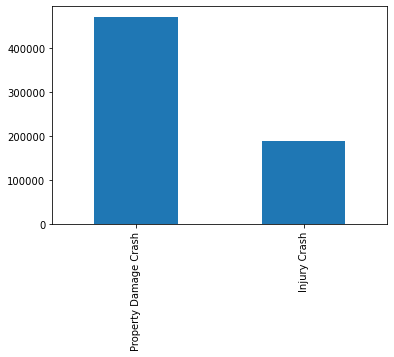

In [17]:
vehicle_crashes_data['REPORT_TYPE'].value_counts().plot.bar()

## Feature engineering

In this step, checking each and every column with their data types and number of values in each column and transforming into proper formats.

In [18]:
# checking the number of values in the C_M_ZONE_FLAG column.
vehicle_crashes_data['C_M_ZONE_FLAG'].value_counts()

N    651346
Y      8915
U       151
Name: C_M_ZONE_FLAG, dtype: int64

#### Some of the columns are having inappropriate datatypes, hence converting them to proper datatypes.

In [19]:
vehicle_crashes_data['C_M_ZONE_FLAG'] = vehicle_crashes_data['C_M_ZONE_FLAG'].astype(str)
vehicle_crashes_data['DISTANCE'] = vehicle_crashes_data['DISTANCE'].astype(float)
vehicle_crashes_data['LOG_MILE'] = vehicle_crashes_data['LOG_MILE'].astype(float)
#vehicle_crashes_data['ACC_DATE'] = vehicle_crashes_data['ACC_DATE'].astype(str)

In [20]:
vehicle_crashes_data['SIGNAL_FLAG_DESC'].value_counts()

No     479038
Yes    181374
Name: SIGNAL_FLAG_DESC, dtype: int64

In [21]:
vehicle_crashes_data['SIGNAL_FLAG'].value_counts()

N    479038
Y    181374
Name: SIGNAL_FLAG, dtype: int64

From the above statements, these two columns data is same, SIGNAL_FLAG_DESC, SIGNAL_FLAG are same. Hence, I would like to drop one of the column. 

In [22]:
vehicle_crashes_data.drop(['SIGNAL_FLAG'],axis='columns',inplace=True)


In [23]:
vehicle_crashes_data['LOGMILE_DIR_FLAG_DESC'].value_counts()

North    274007
East     153683
South     63860
West      40887
Name: LOGMILE_DIR_FLAG_DESC, dtype: int64

In [24]:
vehicle_crashes_data['LOGMILE_DIR_FLAG'].value_counts()

N    274007
E    153683
S     63860
W     40887
U         5
Name: LOGMILE_DIR_FLAG, dtype: int64

From the above statements, these two columns data is same, LOGMILE_DIR_FLAG_DESC, LOGMILE_DIR_FLAG are same. Hence, I would like to drop one of the column. 

In [25]:
vehicle_crashes_data.drop(['LOGMILE_DIR_FLAG'],axis = 'columns',inplace = True)


In [26]:
vehicle_crashes_data['FEET_MILES_FLAG_DESC'].value_counts()

Feet     174913
Miles     29696
Name: FEET_MILES_FLAG_DESC, dtype: int64

In [27]:
vehicle_crashes_data['FEET_MILES_FLAG'].value_counts()

F    501235
M     82977
U     11832
Name: FEET_MILES_FLAG, dtype: int64

In the above statements, we could observe that those two columns represent the same data, but FEET_MILES_FLAG_DESC has more null values and FEET_MILES_FLAG has less null values and more useful for modeling. Hence, drop the FEET_MILES_FLAG_DESC. 

In [28]:
vehicle_crashes_data.drop(['FEET_MILES_FLAG_DESC'],axis = 'columns',inplace = True)

In the description of the columns and in the dataset we noticed that there are some columns that are numerical representations of other columns. We dont need these columns, because we can't understand the data without these description columns. These numerical columns are not necessary, because we have categorical columns, we can use those columns and we can apply one hot encoding those columns for modeling. Hence dropping these numerical columns from the dataframe. 

In [29]:
vehicle_crashes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660412 entries, 0 to 771144
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   660412 non-null  int64  
 1   QUARTER                660412 non-null  object 
 2   LIGHT_DESC             637765 non-null  object 
 3   LIGHT_CODE             660412 non-null  float64
 4   COUNTY_DESC            660403 non-null  object 
 5   COUNTY_NO              660403 non-null  float64
 6   JUNCTION_DESC          574731 non-null  object 
 7   JUNCTION_CODE          596044 non-null  float64
 8   COLLISION_TYPE_DESC    660412 non-null  object 
 9   COLLISION_TYPE_CODE    660412 non-null  int64  
 10  SURF_COND_DESC         594320 non-null  object 
 11  SURF_COND_CODE         596044 non-null  float64
 12  LANE_DESC              504403 non-null  object 
 13  LANE_CODE              504410 non-null  float64
 14  RD_COND_DESC           596044 non-nu

In [30]:
vehicle_crashes_data.drop(['LIGHT_CODE','COUNTY_NO','JUNCTION_CODE','COLLISION_TYPE_CODE','SURF_COND_CODE','LANE_CODE','RD_COND_CODE','RD_DIV_CODE','FIX_OBJ_CODE','WEATHER_CODE','HARM_EVENT_CODE1','HARM_EVENT_CODE2'], 
                          axis = 'columns',
                         inplace = True)

checking the columns after dropping the unnecessary columns

In [31]:
vehicle_crashes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660412 entries, 0 to 771144
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   660412 non-null  int64  
 1   QUARTER                660412 non-null  object 
 2   LIGHT_DESC             637765 non-null  object 
 3   COUNTY_DESC            660403 non-null  object 
 4   JUNCTION_DESC          574731 non-null  object 
 5   COLLISION_TYPE_DESC    660412 non-null  object 
 6   SURF_COND_DESC         594320 non-null  object 
 7   LANE_DESC              504403 non-null  object 
 8   RD_COND_DESC           596044 non-null  object 
 9   RD_DIV_DESC            592590 non-null  object 
 10  FIX_OBJ_DESC           624651 non-null  object 
 11  REPORT_TYPE            660412 non-null  object 
 12  WEATHER_DESC           396599 non-null  object 
 13  ACC_DATE               660412 non-null  int64  
 14  ACC_TIME               660412 non-nu

### Time Series analysis

Creating a new dataframe by copying the original dataframe into the new dataframe and using to work for time series analysis 

In [32]:
#time_series_analysis = vehicle_crashes_data
time_series_analysis = vehicle_crashes_data.copy()

In [33]:
# Convert string to datetime object
#https://github.com/krissylee/data_601_final_project/blob/main/Analysis_Demo.ipynb
time_series_analysis['ACC_DATE'] = pd.to_datetime(time_series_analysis['ACC_DATE'], format='%Y%m%d')
time_series_analysis['ACC_YEAR'] = time_series_analysis['ACC_DATE'].dt.strftime('%Y')
time_series_analysis['ACC_MONTH'] = time_series_analysis['ACC_DATE'].dt.strftime('%m')
time_series_analysis['ACC_YEAR_MONTH'] = time_series_analysis['ACC_DATE'].dt.strftime('%Y-%m')

In [36]:
# Get accidents count grouped by year and month
crashes_by_year_month = time_series_analysis.groupby(['ACC_YEAR_MONTH']).size()
crashes_by_year_month

ACC_YEAR_MONTH
2016-01     9031
2016-02     8872
2016-03     8424
2016-04     9515
2016-05    10899
2016-06     9836
2016-07    10195
2016-08    10268
2016-09    10223
2016-10    10422
2016-11    10364
2016-12     9928
2017-01     8964
2017-02     7764
2017-03     9047
2017-04     9242
2017-05    10142
2017-06     8959
2017-07     9633
2017-08     9606
2017-09     9325
2017-10    10579
2017-11     9826
2017-12    10105
2018-01     9454
2018-02     8381
2018-03     9138
2018-04     8469
2018-05    10179
2018-06     8895
2018-07     9470
2018-08     9441
2018-09     9833
2018-10    10839
2018-11    11239
2018-12    10595
2019-01     9164
2019-02     8694
2019-03     8664
2019-04     9215
2019-05    10357
2019-06     8946
2019-07     9490
2019-08     9368
2019-09     9087
2019-10    10585
2019-11     9727
2019-12    10216
2020-01     8638
2020-02     8345
2020-03     7128
2020-04     4719
2020-05     6303
2020-06     7439
2020-07     8850
2020-08     8827
2020-09     8345
2020-10     9151

In [37]:
# Group accident data by three different subsets (Baltimore Couty, Baltimore City, and Prince George's County) - these are the counties which have the highest vehicle 
# crashes numbers from 2016 to 2021
baltimore_crashes = time_series_analysis[time_series_analysis['COUNTY_DESC']=='Baltimore']
baltimore_city_crashes = time_series_analysis[time_series_analysis['COUNTY_DESC']=='Baltimore City']
prince_georges_crashes = time_series_analysis[time_series_analysis['COUNTY_DESC']=='Prince George\'s']


In [38]:
# Get accidents count by year month for the top three vehicle crashes counties
baltimore_city_crashes_by_year_month = baltimore_city_crashes.groupby(['ACC_YEAR_MONTH']).size()
baltimore_crashes_by_year_month = baltimore_crashes.groupby(['ACC_YEAR_MONTH']).size()
prince_georges_crashes_by_year_month = prince_georges_crashes.groupby(['ACC_YEAR_MONTH']).size()

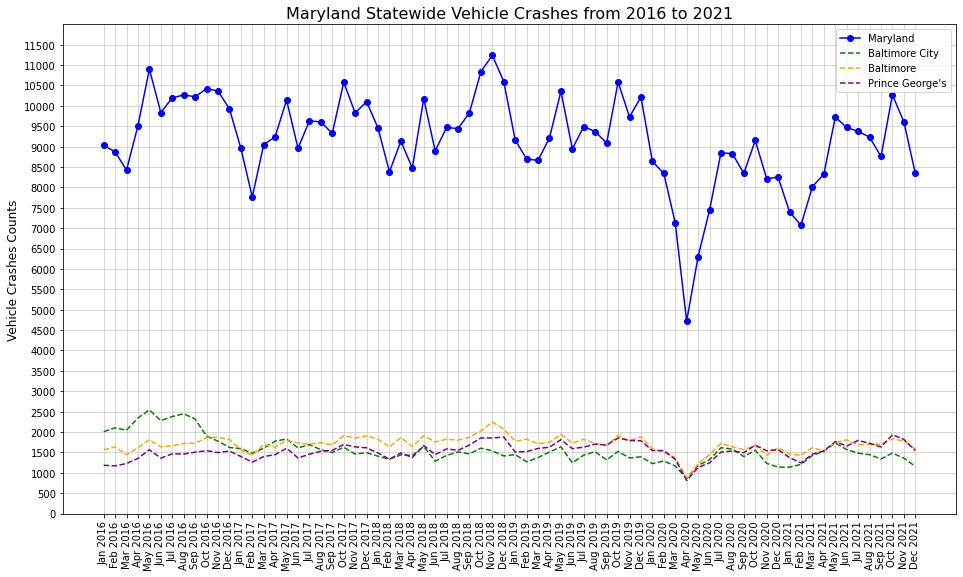

In [39]:
# Visualize the accidents count by year month in a line group
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_ylim(0, 12000)
plt.title("Maryland Statewide Vehicle Crashes from 2016 to 2021", fontsize=16)
plt.ylabel('Vehicle Crashes Counts', fontsize=12)
xticklabels = ['Jan 2016','Feb 2016', 'Mar 2016', 'Apr 2016', 'May 2016', 'Jun 2016', 'Jul 2016', 'Aug 2016', 'Sep 2016', 'Oct 2016', 'Nov 2016', 'Dec 2016', 
               'Jan 2017','Feb 2017', 'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017', 'Jul 2017', 'Aug 2017', 'Sep 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017',
               'Jan 2018','Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018', 'Jun 2018', 'Jul 2018', 'Aug 2018', 'Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018', 
               'Jan 2019','Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019',
               'Jan 2020','Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020', 
               'Jan 2021','Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021', 'Jul 2021', 'Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021']
plt.xticks(range(0, len(xticklabels)), labels = xticklabels, rotation='vertical')
plt.yticks(np.arange(0, 12000, 500))
plt.plot(crashes_by_year_month, color='blue', linestyle='-', marker='o', label='Maryland')
plt.plot(baltimore_city_crashes_by_year_month, color='green', linestyle='dashed', label='Baltimore City')
plt.plot(baltimore_crashes_by_year_month, color='orange', linestyle='dashed', label='Baltimore')
plt.plot(prince_georges_crashes_by_year_month, color='purple', linestyle='dashed', label='Prince George\'s')
ax.set_axisbelow(True)
ax.grid(which='major', linestyle='-', linewidth='0.5')
plt.legend()
plt.show()

In [97]:
#with the outlier in April 2020, the average number of crashes per month are:
(sum(crashes_by_year_month))/(len(crashes_by_year_month))

9172.388888888889

In [40]:
# Remove the outlier in April 2020 to see what is the true average number of crashes per month
(sum(crashes_by_year_month)-crashes_by_year_month['2020-04']) / (len(crashes_by_year_month)-1)

9235.112676056338

From the above line graph, we can notice that there was a huge dip in April 2020. This is because of covid as there was lockdown at every place. At that time, no public vehicles or private vehicles were allowed to move from one place to another except in emergency situations. Only frontline workers, doctors are supposed to move to do their duties. This reduced the vehicle crashes in that month.


In [41]:
# Process the accident date using datetime object in pandas
time_series_analysis['accident_date'] = pd.to_datetime(time_series_analysis['ACC_DATE'].astype(str), format = '%Y-%m-%d')
time_series_analysis['accident_date']

0        2020-06-18
1        2020-04-30
2        2020-05-04
3        2017-05-07
4        2020-04-14
            ...    
771140   2021-12-07
771141   2021-12-30
771142   2021-10-29
771143   2021-12-31
771144   2021-10-30
Name: accident_date, Length: 660412, dtype: datetime64[ns]

In [42]:
# Create the full datetime object that includes both date and time of each accident
time_series_analysis['accident_datetime'] = pd.to_datetime(time_series_analysis.accident_date.astype(str) + ' ' +
                                                  time_series_analysis.ACC_TIME.astype(str), format = '%Y-%m-%d %H:%M:%S')
time_series_analysis['accident_datetime']

0        2020-06-18 15:15:00
1        2020-04-30 06:39:00
2        2020-05-04 09:46:00
3        2017-05-07 10:39:00
4        2020-04-14 17:32:00
                 ...        
771140   2021-12-07 06:10:00
771141   2021-12-30 04:40:00
771142   2021-10-29 11:40:00
771143   2021-12-31 21:07:00
771144   2021-10-30 18:00:00
Name: accident_datetime, Length: 660412, dtype: datetime64[ns]

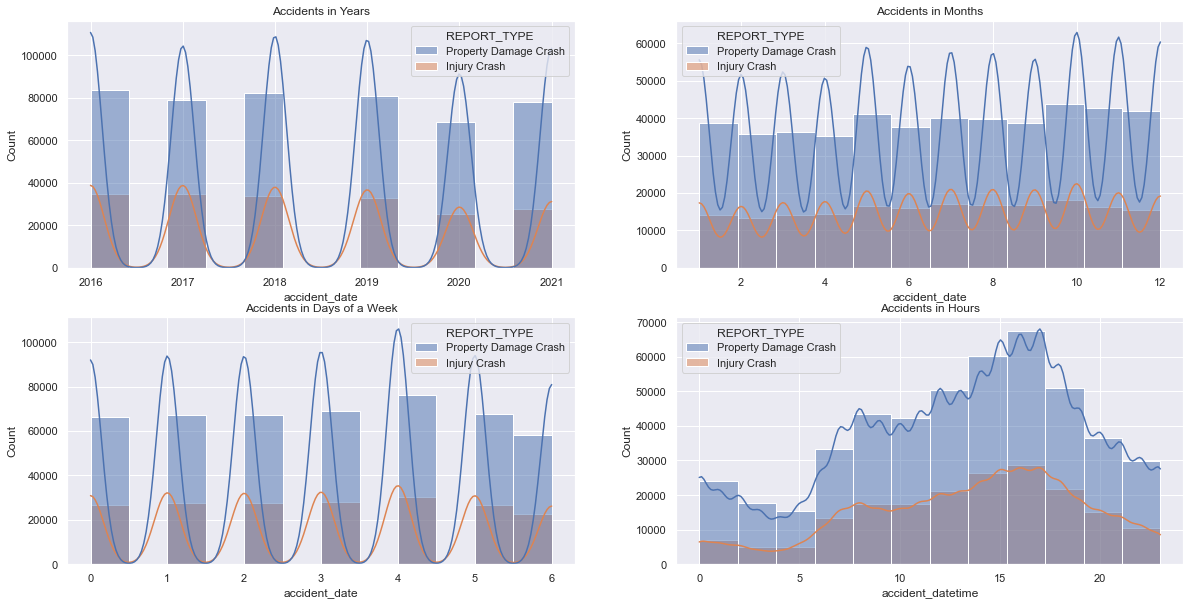

In [43]:
sb.set(style='darkgrid')

fig, axs = plt.subplots(2,2, figsize = (20,10)) 

sb.histplot(data = time_series_analysis, x = time_series_analysis.accident_date.dt.year, bins = 12, 
             hue = time_series_analysis.REPORT_TYPE, kde = True, color = 'skyblue', ax = axs[0,0]).set(title = 'Accidents in Years')


sb.histplot(data = time_series_analysis, x = time_series_analysis.accident_date.dt.month, bins = 12,
             hue = time_series_analysis.REPORT_TYPE, kde = True, color = 'olive', ax = axs[0,1]).set(title = 'Accidents in Months')

sb.histplot(data = time_series_analysis, x = time_series_analysis.accident_date.dt.weekday, bins = 12,
            hue = time_series_analysis.REPORT_TYPE, kde = True, color = 'gold', ax = axs[1,0]).set(title = 'Accidents in Days of a Week')

sb.histplot(data = time_series_analysis, x = time_series_analysis.accident_datetime.dt.hour, bins = 12,
             hue = time_series_analysis.REPORT_TYPE, kde = True, color = 'teal',ax = axs[1,1]).set(title = 'Accidents in Hours')



plt.show()

From the plots above, we can find these insights below:

1.In 2016-2021. Property Damage Crash is the most common report type among all accidents \
2.Most accidents happened in October, November,April and May, while much less accidents happened in Febraury and March.\
3.Insteresting still, Thursday turns out having the greatest number of accidents.\
4.Most accidents happened between 3pm-6pm, which matches the common off-work time.

## Modeling
Implementing different models to perform classification.

Creating a new accuracy list to store the accuracies of algorithm, with their names in the new algorithm list. Finally, I can use this list to visualize the accuracies of all the algorithms. 

In [104]:
#Creating an empty list for storing the accuracies of every algorithm
accuracy_list = []
#List of classification algorithms
algorithm_list = ['Logistic Regression','Random Forest','Decision Trees','Gradient Boosting']

The dataset is splitted in 80% training data and 20% testing data. X contains all the features other than target variable and y contains only column of target variable

In [45]:
X = vehicle_crashes_data[[x for x in vehicle_crashes_data.columns if x != 'REPORT_TYPE']]
y = vehicle_crashes_data['REPORT_TYPE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3000)

print(f'Training examples of maryland vehicle crashes : {X_train.shape[0]}')
print(f'Test examples of maryland vehicle crashes: {X_test.shape[0]}')
print('\nFeature names are:')
print(*X.columns, sep='\t')

Training examples of maryland vehicle crashes : 528329
Test examples of maryland vehicle crashes: 132083

Feature names are:
YEAR	QUARTER	LIGHT_DESC	COUNTY_DESC	JUNCTION_DESC	COLLISION_TYPE_DESC	SURF_COND_DESC	LANE_DESC	RD_COND_DESC	RD_DIV_DESC	FIX_OBJ_DESC	WEATHER_DESC	ACC_DATE	ACC_TIME	SIGNAL_FLAG_DESC	C_M_ZONE_FLAG	HARM_EVENT_DESC1	HARM_EVENT_DESC2	RTE_NO	LOG_MILE	LOGMILE_DIR_FLAG_DESC	DISTANCE	FEET_MILES_FLAG	DISTANCE_DIR_FLAG	REFERENCE_NO	LATITUDE	LONGITUDE


Segregating numerical variables column and categorical variables column using select dtypes function.

In [46]:
# Insert Code
#https://www.stackvidhya.com/pandas-get-column-names/
maryland_numerical = list(vehicle_crashes_data.select_dtypes(['int64']).columns | vehicle_crashes_data.select_dtypes(['float64']).columns)
maryland_categorical = list(vehicle_crashes_data.select_dtypes(['object']).columns)


Plotting the histogram for numerical variables to see the trends in numerical columns

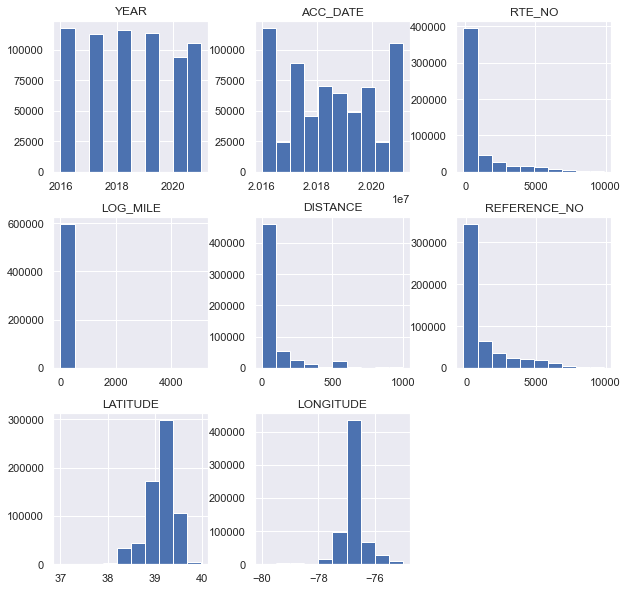

In [113]:
vehicle_crashes_data.select_dtypes(['int64','float64']).hist(figsize = (10,10))
plt.show()


In [47]:
maryland_numerical

['ACC_DATE',
 'DISTANCE',
 'LATITUDE',
 'LOG_MILE',
 'LONGITUDE',
 'REFERENCE_NO',
 'RTE_NO',
 'YEAR']

Removing latitude, longitude and reference_no columns from the numerical variables, because these columns doesn't help ful in further modeling. The reference_no contains unique values of the file numbers.

In [48]:
maryland_numerical.remove('LATITUDE')
maryland_numerical.remove('LONGITUDE')
maryland_numerical.remove('REFERENCE_NO')


In [49]:
maryland_categorical

['QUARTER',
 'LIGHT_DESC',
 'COUNTY_DESC',
 'JUNCTION_DESC',
 'COLLISION_TYPE_DESC',
 'SURF_COND_DESC',
 'LANE_DESC',
 'RD_COND_DESC',
 'RD_DIV_DESC',
 'FIX_OBJ_DESC',
 'REPORT_TYPE',
 'WEATHER_DESC',
 'ACC_TIME',
 'SIGNAL_FLAG_DESC',
 'C_M_ZONE_FLAG',
 'HARM_EVENT_DESC1',
 'HARM_EVENT_DESC2',
 'LOGMILE_DIR_FLAG_DESC',
 'FEET_MILES_FLAG',
 'DISTANCE_DIR_FLAG']

Removing the target variable from the categorical variables, because processing should be performed on other columns except target variable. 

In [50]:
maryland_categorical.remove('REPORT_TYPE')

In [51]:
#https://github.com/appliedecon/data602-lectures/blob/main/sklearn-pipeline-example/credit.ipynb
# numerical columns is processed with simple imputer and standard scaler and categorical variables are processed with Simple imputer and OneHotEncoder.
maryland_num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy = 'median')),
                                    ('standardize_num', StandardScaler())])

maryland_cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy = 'most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown = 'ignore', drop='first'))])


# processing the pipeline with numerical variables and categorical variables and respective pipelines. 
maryland_proc_pipeline = ColumnTransformer(transformers=[('proc_numeric', maryland_num_pipeline, maryland_numerical),
                                                      ('create_dummies', maryland_cat_pipeline, maryland_categorical)])

print(maryland_proc_pipeline)


ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['ACC_DATE', 'DISTANCE', 'LOG_MILE', 'RTE_NO',
                                  'YEAR']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['QUARTER', 'LIGHT_DESC', 'COUNTY_DESC',


## Modeling with Logistic regression

In [52]:
#https://github.com/appliedecon/data602-lectures/blob/main/logistic-regression/logistic-regression.ipynb
%%time ## This gives the total time of running of this model
#implementing the logistic regression model
#defining the function for the logistic regression modeling pipeline with different values of C and penalty of l2
lgr_modeling_pipeline = Pipeline([
        ('data_processing', maryland_proc_pipeline),
        ('logreg', LogisticRegression(penalty = 'l2', solver = 'lbfgs', max_iter = 3000))])

# the model is fitted with training data.
lgr_modeling_pipeline.fit(X_train, y_train)



Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['ACC_DATE', 'DISTANCE',
                                                   'LOG_MILE', 'RTE_NO',
                                                   'YEAR']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                             

In [53]:
%%time

parameters = {'logreg__C': [0.01, 1.0, 5.0, 10]}

#using gridsearchcv and fitting the data with training dataset
lg_data = GridSearchCV(lgr_modeling_pipeline, param_grid = parameters, scoring = 'accuracy', cv = 5, refit = True, verbose = 10)
lg_data = lg_data.fit(X_train, y_train)

lg_data.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START logreg__C=0.01..............................................
[CV 1/5; 1/4] END ...............logreg__C=0.01;, score=0.729 total time=  20.9s
[CV 2/5; 1/4] START logreg__C=0.01..............................................
[CV 2/5; 1/4] END ...............logreg__C=0.01;, score=0.731 total time=  20.2s
[CV 3/5; 1/4] START logreg__C=0.01..............................................
[CV 3/5; 1/4] END ...............logreg__C=0.01;, score=0.730 total time=  20.2s
[CV 4/5; 1/4] START logreg__C=0.01..............................................
[CV 4/5; 1/4] END ...............logreg__C=0.01;, score=0.730 total time=  20.1s
[CV 5/5; 1/4] START logreg__C=0.01..............................................
[CV 5/5; 1/4] END ...............logreg__C=0.01;, score=0.729 total time=  20.8s
[CV 1/5; 2/4] START logreg__C=1.0...............................................
[CV 1/5; 2/4] END ................logreg__C=1.0;,

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['ACC_DATE', 'DISTANCE',
                                                   'LOG_MILE', 'RTE_NO',
                                                   'YEAR']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                             

The logistic regression model is processed with different parameters using 5 fold Cv gridsearch. The best estimator that I got is C = 10. Now I want to verify the parameter by performing secondary gridsearch with other parameters. 

Secondary gridsearchcv with logistic regression

In [54]:
%%time
parameters = {'logreg__C': [10, 12, 15]}

#using gridsearchcv and fitting the data with training dataset
lg_data_secondary = GridSearchCV(lgr_modeling_pipeline, param_grid = parameters, scoring = 'accuracy', cv = 5, refit = True, verbose = 10)
lg_data_secondary = lg_data_secondary.fit(X_train, y_train)

lg_data_secondary.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START logreg__C=10................................................
[CV 1/5; 1/3] END .................logreg__C=10;, score=0.729 total time= 2.5min
[CV 2/5; 1/3] START logreg__C=10................................................
[CV 2/5; 1/3] END .................logreg__C=10;, score=0.731 total time= 2.0min
[CV 3/5; 1/3] START logreg__C=10................................................
[CV 3/5; 1/3] END .................logreg__C=10;, score=0.730 total time= 1.7min
[CV 4/5; 1/3] START logreg__C=10................................................
[CV 4/5; 1/3] END .................logreg__C=10;, score=0.730 total time= 1.8min
[CV 5/5; 1/3] START logreg__C=10................................................
[CV 5/5; 1/3] END .................logreg__C=10;, score=0.728 total time= 1.9min
[CV 1/5; 2/3] START logreg__C=12................................................
[CV 1/5; 2/3] END .................logreg__C=12;,

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['ACC_DATE', 'DISTANCE',
                                                   'LOG_MILE', 'RTE_NO',
                                                   'YEAR']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                             

After performing secondary gridsearch the best parameter is c =15. Hence using this parameter to predict the test data. The classification report is printed.

In [57]:
y_hat_lr = lg_data_secondary.predict(X_test)
    
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat_lr))

                       precision    recall  f1-score   support

         Injury Crash       0.60      0.15      0.24     37952
Property Damage Crash       0.74      0.96      0.83     94131

             accuracy                           0.73    132083
            macro avg       0.67      0.56      0.54    132083
         weighted avg       0.70      0.73      0.66    132083



From this we can observe that the accuracy is about 73%. The recall value for Property damage crash is more. Because in the data, number of values for Property damage crash are more. 

In [105]:
acc = accuracy_score(y_test,y_hat_lr)
accuracy_list.append(acc)

accuracy of the logistic regression is stored in the list that we created to store accuracies. 

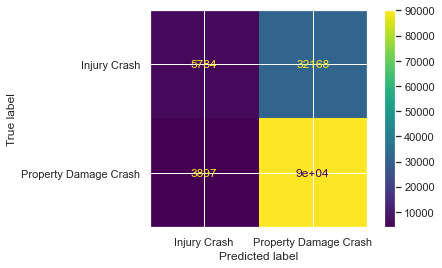

In [59]:
ConfusionMatrixDisplay.from_estimator(lg_data_secondary, X_test, y_test)
plt.show()

From the confusion matrix, we can observe that True positive values are more 90K. and False positive are more than 5.5K. We can observe this model is performing about 73% but not that effective to deal with all the values because Injury crash values are not predicted properly. I think, its because slightly imbalance of classes. 

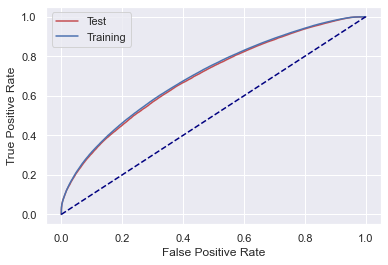

In [60]:
from sklearn.metrics import roc_curve

def generate_probs_lr(X, model = lg_data_secondary):
    return model.predict_proba(X)[:, 1]

def generate_roc_lr(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
y_test_roc = y_test.map({'Property Damage Crash': 1, 'Injury Crash': 0}).astype(int)
y_train_roc = y_train.map({'Property Damage Crash': 1, 'Injury Crash': 0}).astype(int)   
fpr_test, tpr_test = generate_roc_lr(y_test_roc, generate_probs_lr(X_test))
fpr_train, tpr_train = generate_roc_lr(y_train_roc, generate_probs_lr(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()



The roc_auc curve is like a bow-shaped. The training data accuracy and testing data accuracy is almost same with slightly less testing data accuracy. The model is not performing ideally, but it is performing better I would say.  

In [61]:
#y_true = np.argmax(testdata, axis=0)
lg_data_score = lg_data_secondary.score(X_test, y_test)
print(f'Using only logistic regression preprocesser: {lg_data_score:.2%}')

Using only logistic regression preprocesser: 72.70%


In [62]:
from sklearn.metrics import roc_auc_score

lg_roc_auc = roc_auc_score(y_test, generate_probs_lr(X_test), multi_class = 'ovr')
lg_roc_auc

0.6931181701455111

The area under roc is also 70% but not covered more. I tried with different parameters but ended with almost same accuracies. 

### Modeling with Random Forest

Similar steps are applied for Random forest classifier. Intially used few variables are performed Gridsearch on the pipeline. Calculated the best estimators

In [56]:

rf_pipeline = Pipeline([
    ('data_processing', maryland_proc_pipeline),
    ('rf', RandomForestClassifier())]
)

param_grid = [{'rf__max_depth': [5, 8, 10],
               'rf__n_estimators': [10, 50],
               'rf__class_weight': [None, 'balanced', 'balanced_subsample'],
               'rf__max_samples': [1000, 2000]
              }]

rf_results = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, scoring='accuracy', refit=True, verbose = 10)
rf_results = rf_results.fit(X_train, y_train)
rf_yhat = rf_results.predict(X_test)

rf_results.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START rf__class_weight=None, rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10
[CV 1/5; 1/36] END rf__class_weight=None, rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10;, score=0.714 total time=   4.4s
[CV 2/5; 1/36] START rf__class_weight=None, rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10
[CV 2/5; 1/36] END rf__class_weight=None, rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10;, score=0.714 total time=   4.2s
[CV 3/5; 1/36] START rf__class_weight=None, rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10
[CV 3/5; 1/36] END rf__class_weight=None, rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10;, score=0.714 total time=   4.1s
[CV 4/5; 1/36] START rf__class_weight=None, rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10
[CV 4/5; 1/36] END rf__class_weight=None, rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10;, score=0.714 total tim

[CV 5/5; 7/36] END rf__class_weight=None, rf__max_depth=8, rf__max_samples=2000, rf__n_estimators=10;, score=0.714 total time=   4.3s
[CV 1/5; 8/36] START rf__class_weight=None, rf__max_depth=8, rf__max_samples=2000, rf__n_estimators=50
[CV 1/5; 8/36] END rf__class_weight=None, rf__max_depth=8, rf__max_samples=2000, rf__n_estimators=50;, score=0.714 total time=   5.8s
[CV 2/5; 8/36] START rf__class_weight=None, rf__max_depth=8, rf__max_samples=2000, rf__n_estimators=50
[CV 2/5; 8/36] END rf__class_weight=None, rf__max_depth=8, rf__max_samples=2000, rf__n_estimators=50;, score=0.714 total time=   6.1s
[CV 3/5; 8/36] START rf__class_weight=None, rf__max_depth=8, rf__max_samples=2000, rf__n_estimators=50
[CV 3/5; 8/36] END rf__class_weight=None, rf__max_depth=8, rf__max_samples=2000, rf__n_estimators=50;, score=0.714 total time=   5.8s
[CV 4/5; 8/36] START rf__class_weight=None, rf__max_depth=8, rf__max_samples=2000, rf__n_estimators=50
[CV 4/5; 8/36] END rf__class_weight=None, rf__max_de

[CV 4/5; 14/36] END rf__class_weight=balanced, rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=50;, score=0.643 total time=   5.7s
[CV 5/5; 14/36] START rf__class_weight=balanced, rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=50
[CV 5/5; 14/36] END rf__class_weight=balanced, rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=50;, score=0.628 total time=   5.7s
[CV 1/5; 15/36] START rf__class_weight=balanced, rf__max_depth=5, rf__max_samples=2000, rf__n_estimators=10
[CV 1/5; 15/36] END rf__class_weight=balanced, rf__max_depth=5, rf__max_samples=2000, rf__n_estimators=10;, score=0.619 total time=   4.4s
[CV 2/5; 15/36] START rf__class_weight=balanced, rf__max_depth=5, rf__max_samples=2000, rf__n_estimators=10
[CV 2/5; 15/36] END rf__class_weight=balanced, rf__max_depth=5, rf__max_samples=2000, rf__n_estimators=10;, score=0.616 total time=   4.4s
[CV 3/5; 15/36] START rf__class_weight=balanced, rf__max_depth=5, rf__max_samples=2000, rf__n_estimators=10
[CV 3/5; 15/

[CV 3/5; 21/36] END rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=10;, score=0.624 total time=   4.4s
[CV 4/5; 21/36] START rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=10
[CV 4/5; 21/36] END rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=10;, score=0.646 total time=   4.4s
[CV 5/5; 21/36] START rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=10
[CV 5/5; 21/36] END rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=10;, score=0.638 total time=   4.4s
[CV 1/5; 22/36] START rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=50
[CV 1/5; 22/36] END rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=50;, score=0.659 total time=   5.8s
[CV 2/5; 22/36] START rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=50
[CV 

[CV 5/5; 27/36] END rf__class_weight=balanced_subsample, rf__max_depth=5, rf__max_samples=2000, rf__n_estimators=10;, score=0.613 total time=   4.2s
[CV 1/5; 28/36] START rf__class_weight=balanced_subsample, rf__max_depth=5, rf__max_samples=2000, rf__n_estimators=50
[CV 1/5; 28/36] END rf__class_weight=balanced_subsample, rf__max_depth=5, rf__max_samples=2000, rf__n_estimators=50;, score=0.634 total time=   6.3s
[CV 2/5; 28/36] START rf__class_weight=balanced_subsample, rf__max_depth=5, rf__max_samples=2000, rf__n_estimators=50
[CV 2/5; 28/36] END rf__class_weight=balanced_subsample, rf__max_depth=5, rf__max_samples=2000, rf__n_estimators=50;, score=0.629 total time=   6.5s
[CV 3/5; 28/36] START rf__class_weight=balanced_subsample, rf__max_depth=5, rf__max_samples=2000, rf__n_estimators=50
[CV 3/5; 28/36] END rf__class_weight=balanced_subsample, rf__max_depth=5, rf__max_samples=2000, rf__n_estimators=50;, score=0.631 total time=   6.2s
[CV 4/5; 28/36] START rf__class_weight=balanced_su

[CV 1/5; 34/36] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=50;, score=0.657 total time=   6.4s
[CV 2/5; 34/36] START rf__class_weight=balanced_subsample, rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=50
[CV 2/5; 34/36] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=50;, score=0.664 total time=   6.4s
[CV 3/5; 34/36] START rf__class_weight=balanced_subsample, rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=50
[CV 3/5; 34/36] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=50;, score=0.666 total time=   6.4s
[CV 4/5; 34/36] START rf__class_weight=balanced_subsample, rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=50
[CV 4/5; 34/36] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=50;, score=0.661 total time=   6.6s
[CV 5/5; 34/36] START rf__class_weight=bala

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['ACC_DATE', 'DISTANCE',
                                                   'LOG_MILE', 'RTE_NO',
                                                   'YEAR']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                             

The best parameters after performing the model are max_depth=10, max_samples=2000,n_estimators=10. Now, Secondary gridsearch is applied to check the best estimators and verify them. 

Secondary gridsearchcv

In [80]:
param_grid = [{'rf__max_depth': [10, 12, 15],
               'rf__n_estimators': [50, 75],
               'rf__class_weight': [None, 'balanced', 'balanced_subsample'],
               'rf__max_samples': [2000, 3000]
              }]

rf_results_sec = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, scoring='accuracy', refit=True, verbose = 10)
rf_results_sec = rf_results_sec.fit(X_train, y_train)
rf_yhat = rf_results_sec.predict(X_test)

rf_results_sec.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START rf__class_weight=None, rf__max_depth=10, rf__max_samples=2000, rf__n_estimators=50
[CV 1/5; 1/36] END rf__class_weight=None, rf__max_depth=10, rf__max_samples=2000, rf__n_estimators=50;, score=0.715 total time=   9.9s
[CV 2/5; 1/36] START rf__class_weight=None, rf__max_depth=10, rf__max_samples=2000, rf__n_estimators=50
[CV 2/5; 1/36] END rf__class_weight=None, rf__max_depth=10, rf__max_samples=2000, rf__n_estimators=50;, score=0.714 total time=   9.0s
[CV 3/5; 1/36] START rf__class_weight=None, rf__max_depth=10, rf__max_samples=2000, rf__n_estimators=50
[CV 3/5; 1/36] END rf__class_weight=None, rf__max_depth=10, rf__max_samples=2000, rf__n_estimators=50;, score=0.715 total time=   9.0s
[CV 4/5; 1/36] START rf__class_weight=None, rf__max_depth=10, rf__max_samples=2000, rf__n_estimators=50
[CV 4/5; 1/36] END rf__class_weight=None, rf__max_depth=10, rf__max_samples=2000, rf__n_estimators=50;, score=0.714 t

[CV 5/5; 7/36] END rf__class_weight=None, rf__max_depth=12, rf__max_samples=3000, rf__n_estimators=50;, score=0.715 total time=  10.1s
[CV 1/5; 8/36] START rf__class_weight=None, rf__max_depth=12, rf__max_samples=3000, rf__n_estimators=75
[CV 1/5; 8/36] END rf__class_weight=None, rf__max_depth=12, rf__max_samples=3000, rf__n_estimators=75;, score=0.715 total time=  11.2s
[CV 2/5; 8/36] START rf__class_weight=None, rf__max_depth=12, rf__max_samples=3000, rf__n_estimators=75
[CV 2/5; 8/36] END rf__class_weight=None, rf__max_depth=12, rf__max_samples=3000, rf__n_estimators=75;, score=0.714 total time=  11.1s
[CV 3/5; 8/36] START rf__class_weight=None, rf__max_depth=12, rf__max_samples=3000, rf__n_estimators=75
[CV 3/5; 8/36] END rf__class_weight=None, rf__max_depth=12, rf__max_samples=3000, rf__n_estimators=75;, score=0.715 total time=  10.9s
[CV 4/5; 8/36] START rf__class_weight=None, rf__max_depth=12, rf__max_samples=3000, rf__n_estimators=75
[CV 4/5; 8/36] END rf__class_weight=None, rf

[CV 4/5; 14/36] END rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=2000, rf__n_estimators=75;, score=0.648 total time=  11.0s
[CV 5/5; 14/36] START rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=2000, rf__n_estimators=75
[CV 5/5; 14/36] END rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=2000, rf__n_estimators=75;, score=0.653 total time=  10.9s
[CV 1/5; 15/36] START rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=3000, rf__n_estimators=50
[CV 1/5; 15/36] END rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=3000, rf__n_estimators=50;, score=0.631 total time=   9.6s
[CV 2/5; 15/36] START rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=3000, rf__n_estimators=50
[CV 2/5; 15/36] END rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=3000, rf__n_estimators=50;, score=0.637 total time=   9.6s
[CV 3/5; 15/36] START rf__class_weight=balanced, rf__max_depth=10, rf__max_samples=3000, rf__n_estimators=50
[CV 

[CV 2/5; 21/36] END rf__class_weight=balanced, rf__max_depth=15, rf__max_samples=2000, rf__n_estimators=50;, score=0.661 total time=  10.2s
[CV 3/5; 21/36] START rf__class_weight=balanced, rf__max_depth=15, rf__max_samples=2000, rf__n_estimators=50
[CV 3/5; 21/36] END rf__class_weight=balanced, rf__max_depth=15, rf__max_samples=2000, rf__n_estimators=50;, score=0.664 total time=  10.2s
[CV 4/5; 21/36] START rf__class_weight=balanced, rf__max_depth=15, rf__max_samples=2000, rf__n_estimators=50
[CV 4/5; 21/36] END rf__class_weight=balanced, rf__max_depth=15, rf__max_samples=2000, rf__n_estimators=50;, score=0.666 total time=  10.1s
[CV 5/5; 21/36] START rf__class_weight=balanced, rf__max_depth=15, rf__max_samples=2000, rf__n_estimators=50
[CV 5/5; 21/36] END rf__class_weight=balanced, rf__max_depth=15, rf__max_samples=2000, rf__n_estimators=50;, score=0.664 total time=  10.1s
[CV 1/5; 22/36] START rf__class_weight=balanced, rf__max_depth=15, rf__max_samples=2000, rf__n_estimators=75
[CV 

[CV 4/5; 27/36] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__max_samples=3000, rf__n_estimators=50;, score=0.639 total time=  10.6s
[CV 5/5; 27/36] START rf__class_weight=balanced_subsample, rf__max_depth=10, rf__max_samples=3000, rf__n_estimators=50
[CV 5/5; 27/36] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__max_samples=3000, rf__n_estimators=50;, score=0.643 total time=  10.6s
[CV 1/5; 28/36] START rf__class_weight=balanced_subsample, rf__max_depth=10, rf__max_samples=3000, rf__n_estimators=75
[CV 1/5; 28/36] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__max_samples=3000, rf__n_estimators=75;, score=0.642 total time=  12.8s
[CV 2/5; 28/36] START rf__class_weight=balanced_subsample, rf__max_depth=10, rf__max_samples=3000, rf__n_estimators=75
[CV 2/5; 28/36] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__max_samples=3000, rf__n_estimators=75;, score=0.641 total time=  12.7s
[CV 3/5; 28/36] START rf__class_weight=bala

[CV 5/5; 33/36] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__max_samples=2000, rf__n_estimators=50;, score=0.669 total time=  11.0s
[CV 1/5; 34/36] START rf__class_weight=balanced_subsample, rf__max_depth=15, rf__max_samples=2000, rf__n_estimators=75
[CV 1/5; 34/36] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__max_samples=2000, rf__n_estimators=75;, score=0.671 total time=  13.6s
[CV 2/5; 34/36] START rf__class_weight=balanced_subsample, rf__max_depth=15, rf__max_samples=2000, rf__n_estimators=75
[CV 2/5; 34/36] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__max_samples=2000, rf__n_estimators=75;, score=0.676 total time=  13.6s
[CV 3/5; 34/36] START rf__class_weight=balanced_subsample, rf__max_depth=15, rf__max_samples=2000, rf__n_estimators=75
[CV 3/5; 34/36] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__max_samples=2000, rf__n_estimators=75;, score=0.668 total time=  13.8s
[CV 4/5; 34/36] START rf__class_weight=bala

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['ACC_DATE', 'DISTANCE',
                                                   'LOG_MILE', 'RTE_NO',
                                                   'YEAR']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                             

After performing secondary GSC, the best parameters are changed they are max_depth=15, max_samples=2000, n_estimators=50. Hence these parameters are used for classification report, accuracy and confusion matrix.

In [98]:
y_testprf = rf_results_sec.predict(X_test)
y_testp_rf = rf_results_sec.predict_proba(X_test)


print(classification_report(y_test, y_testprf))

                       precision    recall  f1-score   support

         Injury Crash       0.88      0.00      0.01     37952
Property Damage Crash       0.71      1.00      0.83     94131

             accuracy                           0.71    132083
            macro avg       0.80      0.50      0.42    132083
         weighted avg       0.76      0.71      0.60    132083



We can notice that, this model is not performing well compared to LR. The accuracy is 71% and the recall for Injury Crash class is zero, that means the model is predicting less false positive values. 

In [106]:
acc = accuracy_score(y_test,y_testprf)
accuracy_list.append(acc)

storing the accuracy of the random forest in the list and printing the confusion matrix in the below cell. In the confusion matrix we can observe that number of values predicted as injury crash are less. That means this model is not giving proper results for the dataset. 

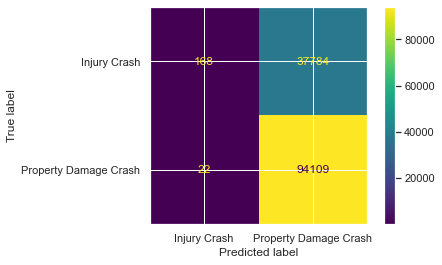

In [100]:
ConfusionMatrixDisplay.from_estimator(rf_results_sec, X_test, y_test)
plt.show()

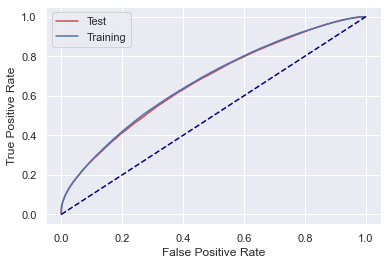

In [101]:
from sklearn.metrics import roc_curve

def generate_probs_rf(X, model = rf_results_sec):
    return model.predict_proba(X)[:, 1]

def generate_roc_rf(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
y_test_roc = y_test.map({'Property Damage Crash': 1, 'Injury Crash': 0}).astype(int)
y_train_roc = y_train.map({'Property Damage Crash': 1, 'Injury Crash': 0}).astype(int)   
fpr_test, tpr_test = generate_roc_rf(y_test_roc, generate_probs_rf(X_test))
fpr_train, tpr_train = generate_roc_rf(y_train_roc, generate_probs_rf(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()



The roc_auc curve is shrinked a little compared to curve of LR. The training accuracy and testing accuracy is almost same but less. The accuracy is about 71.38% only.

In [102]:

rf_data_score = rf_results_sec.score(X_test, y_test)
print(f'Using only Random Forest preprocesser: {rf_data_score:.2%}')

Using only Random Forest preprocesser: 71.38%


In [103]:
from sklearn.metrics import roc_auc_score

rf_roc_auc = roc_auc_score(y_test, generate_probs_rf(X_test), multi_class = 'ovr')
rf_roc_auc

0.6680197304909452

This model is not recommened for this dataset. Because the accuracy is least for this model. For time being we can go ahead with Logistic regression algorithm.

### Modeling with Decision Trees

In [63]:
#https://github.com/appliedecon/data602-lectures/blob/main/logistic-regression/logistic-regression.ipynb
%timeit
from sklearn.tree import DecisionTreeClassifier
#implementing the decision tree model

dt_modeling_pipeline = Pipeline([
        ('data_processing', maryland_proc_pipeline),
        ('dt', DecisionTreeClassifier())])
dt_modeling_pipeline.fit(X_train, y_train)

param_grid = [
  {'dt__max_depth': [2, 5, 10, 15],
   'dt__min_samples_split':[3, 5, 10, 20],
   'dt__min_samples_leaf': [2, 5],
   'dt__class_weight':[None, 'balanced']
  }
 ]

gcv_results = GridSearchCV(estimator = dt_modeling_pipeline, 
                           param_grid = param_grid, scoring='accuracy', refit=True, verbose = 10)
gcv_results = gcv_results.fit(X_train, y_train)

gcv_results.best_estimator_


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5; 1/64] START dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=2, dt__min_samples_split=3
[CV 1/5; 1/64] END dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=2, dt__min_samples_split=3;, score=0.717 total time=   4.7s
[CV 2/5; 1/64] START dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=2, dt__min_samples_split=3
[CV 2/5; 1/64] END dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=2, dt__min_samples_split=3;, score=0.718 total time=   4.1s
[CV 3/5; 1/64] START dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=2, dt__min_samples_split=3
[CV 3/5; 1/64] END dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=2, dt__min_samples_split=3;, score=0.718 total time=   4.1s
[CV 4/5; 1/64] START dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=2, dt__min_samples_split=3
[CV 4/5; 1/64] END dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=2,

[CV 4/5; 7/64] END dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=5, dt__min_samples_split=10;, score=0.718 total time=   4.0s
[CV 5/5; 7/64] START dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=5, dt__min_samples_split=10
[CV 5/5; 7/64] END dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=5, dt__min_samples_split=10;, score=0.718 total time=   4.0s
[CV 1/5; 8/64] START dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=5, dt__min_samples_split=20
[CV 1/5; 8/64] END dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=5, dt__min_samples_split=20;, score=0.717 total time=   4.0s
[CV 2/5; 8/64] START dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=5, dt__min_samples_split=20
[CV 2/5; 8/64] END dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=5, dt__min_samples_split=20;, score=0.718 total time=   4.0s
[CV 3/5; 8/64] START dt__class_weight=None, dt__max_depth=2, dt__min_samples_leaf=5, dt__min_samples_split

[CV 2/5; 14/64] END dt__class_weight=None, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=5;, score=0.726 total time=   4.9s
[CV 3/5; 14/64] START dt__class_weight=None, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=5
[CV 3/5; 14/64] END dt__class_weight=None, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=5;, score=0.726 total time=   4.9s
[CV 4/5; 14/64] START dt__class_weight=None, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=5
[CV 4/5; 14/64] END dt__class_weight=None, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=5;, score=0.726 total time=   4.9s
[CV 5/5; 14/64] START dt__class_weight=None, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=5
[CV 5/5; 14/64] END dt__class_weight=None, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=5;, score=0.725 total time=   4.9s
[CV 1/5; 15/64] START dt__class_weight=None, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_spli

[CV 5/5; 20/64] END dt__class_weight=None, dt__max_depth=10, dt__min_samples_leaf=2, dt__min_samples_split=20;, score=0.727 total time=   8.5s
[CV 1/5; 21/64] START dt__class_weight=None, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=3
[CV 1/5; 21/64] END dt__class_weight=None, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=3;, score=0.727 total time=   8.5s
[CV 2/5; 21/64] START dt__class_weight=None, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=3
[CV 2/5; 21/64] END dt__class_weight=None, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=3;, score=0.729 total time=   8.9s
[CV 3/5; 21/64] START dt__class_weight=None, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=3
[CV 3/5; 21/64] END dt__class_weight=None, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=3;, score=0.729 total time=   8.9s
[CV 4/5; 21/64] START dt__class_weight=None, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_sam

[CV 3/5; 27/64] END dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=2, dt__min_samples_split=10;, score=0.728 total time=  17.3s
[CV 4/5; 27/64] START dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=2, dt__min_samples_split=10
[CV 4/5; 27/64] END dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=2, dt__min_samples_split=10;, score=0.728 total time=  16.8s
[CV 5/5; 27/64] START dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=2, dt__min_samples_split=10
[CV 5/5; 27/64] END dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=2, dt__min_samples_split=10;, score=0.727 total time=  17.3s
[CV 1/5; 28/64] START dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=2, dt__min_samples_split=20
[CV 1/5; 28/64] END dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=2, dt__min_samples_split=20;, score=0.726 total time=  16.7s
[CV 2/5; 28/64] START dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=2, dt__m

[CV 1/5; 34/64] END dt__class_weight=balanced, dt__max_depth=2, dt__min_samples_leaf=2, dt__min_samples_split=5;, score=0.648 total time=   4.4s
[CV 2/5; 34/64] START dt__class_weight=balanced, dt__max_depth=2, dt__min_samples_leaf=2, dt__min_samples_split=5
[CV 2/5; 34/64] END dt__class_weight=balanced, dt__max_depth=2, dt__min_samples_leaf=2, dt__min_samples_split=5;, score=0.648 total time=   4.4s
[CV 3/5; 34/64] START dt__class_weight=balanced, dt__max_depth=2, dt__min_samples_leaf=2, dt__min_samples_split=5
[CV 3/5; 34/64] END dt__class_weight=balanced, dt__max_depth=2, dt__min_samples_leaf=2, dt__min_samples_split=5;, score=0.648 total time=   4.3s
[CV 4/5; 34/64] START dt__class_weight=balanced, dt__max_depth=2, dt__min_samples_leaf=2, dt__min_samples_split=5
[CV 4/5; 34/64] END dt__class_weight=balanced, dt__max_depth=2, dt__min_samples_leaf=2, dt__min_samples_split=5;, score=0.647 total time=   4.4s
[CV 5/5; 34/64] START dt__class_weight=balanced, dt__max_depth=2, dt__min_samp

[CV 3/5; 40/64] END dt__class_weight=balanced, dt__max_depth=2, dt__min_samples_leaf=5, dt__min_samples_split=20;, score=0.648 total time=   4.3s
[CV 4/5; 40/64] START dt__class_weight=balanced, dt__max_depth=2, dt__min_samples_leaf=5, dt__min_samples_split=20
[CV 4/5; 40/64] END dt__class_weight=balanced, dt__max_depth=2, dt__min_samples_leaf=5, dt__min_samples_split=20;, score=0.647 total time=   4.3s
[CV 5/5; 40/64] START dt__class_weight=balanced, dt__max_depth=2, dt__min_samples_leaf=5, dt__min_samples_split=20
[CV 5/5; 40/64] END dt__class_weight=balanced, dt__max_depth=2, dt__min_samples_leaf=5, dt__min_samples_split=20;, score=0.649 total time=   4.3s
[CV 1/5; 41/64] START dt__class_weight=balanced, dt__max_depth=5, dt__min_samples_leaf=2, dt__min_samples_split=3
[CV 1/5; 41/64] END dt__class_weight=balanced, dt__max_depth=5, dt__min_samples_leaf=2, dt__min_samples_split=3;, score=0.581 total time=   5.1s
[CV 2/5; 41/64] START dt__class_weight=balanced, dt__max_depth=5, dt__min

[CV 5/5; 46/64] END dt__class_weight=balanced, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=5;, score=0.581 total time=   5.2s
[CV 1/5; 47/64] START dt__class_weight=balanced, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=10
[CV 1/5; 47/64] END dt__class_weight=balanced, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=10;, score=0.581 total time=   5.1s
[CV 2/5; 47/64] START dt__class_weight=balanced, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=10
[CV 2/5; 47/64] END dt__class_weight=balanced, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=10;, score=0.583 total time=   5.1s
[CV 3/5; 47/64] START dt__class_weight=balanced, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=10
[CV 3/5; 47/64] END dt__class_weight=balanced, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=10;, score=0.582 total time=   5.2s
[CV 4/5; 47/64] START dt__class_weight=balanced, dt__max_depth=5, dt__mi

[CV 2/5; 53/64] END dt__class_weight=balanced, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=3;, score=0.617 total time=   8.8s
[CV 3/5; 53/64] START dt__class_weight=balanced, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=3
[CV 3/5; 53/64] END dt__class_weight=balanced, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=3;, score=0.626 total time=   8.8s
[CV 4/5; 53/64] START dt__class_weight=balanced, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=3
[CV 4/5; 53/64] END dt__class_weight=balanced, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=3;, score=0.620 total time=   8.7s
[CV 5/5; 53/64] START dt__class_weight=balanced, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=3
[CV 5/5; 53/64] END dt__class_weight=balanced, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=3;, score=0.622 total time=   8.7s
[CV 1/5; 54/64] START dt__class_weight=balanced, dt__max_depth=10, dt__

[CV 4/5; 59/64] END dt__class_weight=balanced, dt__max_depth=15, dt__min_samples_leaf=2, dt__min_samples_split=10;, score=0.614 total time=  17.0s
[CV 5/5; 59/64] START dt__class_weight=balanced, dt__max_depth=15, dt__min_samples_leaf=2, dt__min_samples_split=10
[CV 5/5; 59/64] END dt__class_weight=balanced, dt__max_depth=15, dt__min_samples_leaf=2, dt__min_samples_split=10;, score=0.645 total time=  17.2s
[CV 1/5; 60/64] START dt__class_weight=balanced, dt__max_depth=15, dt__min_samples_leaf=2, dt__min_samples_split=20
[CV 1/5; 60/64] END dt__class_weight=balanced, dt__max_depth=15, dt__min_samples_leaf=2, dt__min_samples_split=20;, score=0.631 total time=  17.1s
[CV 2/5; 60/64] START dt__class_weight=balanced, dt__max_depth=15, dt__min_samples_leaf=2, dt__min_samples_split=20
[CV 2/5; 60/64] END dt__class_weight=balanced, dt__max_depth=15, dt__min_samples_leaf=2, dt__min_samples_split=20;, score=0.640 total time=  17.1s
[CV 3/5; 60/64] START dt__class_weight=balanced, dt__max_depth=1

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['ACC_DATE', 'DISTANCE',
                                                   'LOG_MILE', 'RTE_NO',
                                                   'YEAR']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                             

The best parameters after performing the model are max_depth=10, min_samples_leaf=2,min_samples_split=20. Now, Secondary gridsearch is applied to check the best estimators and verify them.

secondary gridsearch 

In [64]:
param_grid = [
  {'dt__max_depth': [10, 12, 15],
   'dt__min_samples_split':[5, 8, 10],
   'dt__min_samples_leaf': [5, 6],
   'dt__class_weight':[None, 'balanced']
  }
 ]

gcv_results_sec = GridSearchCV(estimator = dt_modeling_pipeline, 
                           param_grid = param_grid, scoring='accuracy', refit=True, verbose = 10)
gcv_results_sec = gcv_results_sec.fit(X_train, y_train)

gcv_results_sec.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START dt__class_weight=None, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=5
[CV 1/5; 1/36] END dt__class_weight=None, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=5;, score=0.727 total time=   8.7s
[CV 2/5; 1/36] START dt__class_weight=None, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=5
[CV 2/5; 1/36] END dt__class_weight=None, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=5;, score=0.729 total time=   8.8s
[CV 3/5; 1/36] START dt__class_weight=None, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=5
[CV 3/5; 1/36] END dt__class_weight=None, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=5;, score=0.729 total time=   8.6s
[CV 4/5; 1/36] START dt__class_weight=None, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=5
[CV 4/5; 1/36] END dt__class_weight=None, dt__max_depth=10, dt__min_samples

[CV 3/5; 7/36] END dt__class_weight=None, dt__max_depth=12, dt__min_samples_leaf=5, dt__min_samples_split=5;, score=0.729 total time=  11.4s
[CV 4/5; 7/36] START dt__class_weight=None, dt__max_depth=12, dt__min_samples_leaf=5, dt__min_samples_split=5
[CV 4/5; 7/36] END dt__class_weight=None, dt__max_depth=12, dt__min_samples_leaf=5, dt__min_samples_split=5;, score=0.730 total time=  11.2s
[CV 5/5; 7/36] START dt__class_weight=None, dt__max_depth=12, dt__min_samples_leaf=5, dt__min_samples_split=5
[CV 5/5; 7/36] END dt__class_weight=None, dt__max_depth=12, dt__min_samples_leaf=5, dt__min_samples_split=5;, score=0.728 total time=  11.7s
[CV 1/5; 8/36] START dt__class_weight=None, dt__max_depth=12, dt__min_samples_leaf=5, dt__min_samples_split=8
[CV 1/5; 8/36] END dt__class_weight=None, dt__max_depth=12, dt__min_samples_leaf=5, dt__min_samples_split=8;, score=0.729 total time=  11.6s
[CV 2/5; 8/36] START dt__class_weight=None, dt__max_depth=12, dt__min_samples_leaf=5, dt__min_samples_spli

[CV 1/5; 14/36] END dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=8;, score=0.726 total time=  17.1s
[CV 2/5; 14/36] START dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=8
[CV 2/5; 14/36] END dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=8;, score=0.728 total time=  17.3s
[CV 3/5; 14/36] START dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=8
[CV 3/5; 14/36] END dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=8;, score=0.727 total time=  17.4s
[CV 4/5; 14/36] START dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=8
[CV 4/5; 14/36] END dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=8;, score=0.727 total time=  16.7s
[CV 5/5; 14/36] START dt__class_weight=None, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samp

[CV 4/5; 20/36] END dt__class_weight=balanced, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=8;, score=0.620 total time=   8.7s
[CV 5/5; 20/36] START dt__class_weight=balanced, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=8
[CV 5/5; 20/36] END dt__class_weight=balanced, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=8;, score=0.622 total time=   8.9s
[CV 1/5; 21/36] START dt__class_weight=balanced, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=10
[CV 1/5; 21/36] END dt__class_weight=balanced, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=10;, score=0.629 total time=   8.9s
[CV 2/5; 21/36] START dt__class_weight=balanced, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=10
[CV 2/5; 21/36] END dt__class_weight=balanced, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=10;, score=0.617 total time=   8.8s
[CV 3/5; 21/36] START dt__class_weight=balanced, dt__max_depth=10, 

[CV 1/5; 27/36] END dt__class_weight=balanced, dt__max_depth=12, dt__min_samples_leaf=5, dt__min_samples_split=10;, score=0.638 total time=  11.8s
[CV 2/5; 27/36] START dt__class_weight=balanced, dt__max_depth=12, dt__min_samples_leaf=5, dt__min_samples_split=10
[CV 2/5; 27/36] END dt__class_weight=balanced, dt__max_depth=12, dt__min_samples_leaf=5, dt__min_samples_split=10;, score=0.635 total time=  11.8s
[CV 3/5; 27/36] START dt__class_weight=balanced, dt__max_depth=12, dt__min_samples_leaf=5, dt__min_samples_split=10
[CV 3/5; 27/36] END dt__class_weight=balanced, dt__max_depth=12, dt__min_samples_leaf=5, dt__min_samples_split=10;, score=0.634 total time=  11.8s
[CV 4/5; 27/36] START dt__class_weight=balanced, dt__max_depth=12, dt__min_samples_leaf=5, dt__min_samples_split=10
[CV 4/5; 27/36] END dt__class_weight=balanced, dt__max_depth=12, dt__min_samples_leaf=5, dt__min_samples_split=10;, score=0.607 total time=  11.6s
[CV 5/5; 27/36] START dt__class_weight=balanced, dt__max_depth=1

[CV 3/5; 33/36] END dt__class_weight=balanced, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=10;, score=0.628 total time=  17.4s
[CV 4/5; 33/36] START dt__class_weight=balanced, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=10
[CV 4/5; 33/36] END dt__class_weight=balanced, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=10;, score=0.614 total time=  17.1s
[CV 5/5; 33/36] START dt__class_weight=balanced, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=10
[CV 5/5; 33/36] END dt__class_weight=balanced, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=10;, score=0.643 total time=  17.4s
[CV 1/5; 34/36] START dt__class_weight=balanced, dt__max_depth=15, dt__min_samples_leaf=6, dt__min_samples_split=5
[CV 1/5; 34/36] END dt__class_weight=balanced, dt__max_depth=15, dt__min_samples_leaf=6, dt__min_samples_split=5;, score=0.629 total time=  17.5s
[CV 2/5; 34/36] START dt__class_weight=balanced, dt__max_depth=15,

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['ACC_DATE', 'DISTANCE',
                                                   'LOG_MILE', 'RTE_NO',
                                                   'YEAR']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                             

After performing secondary GSC, the best parameters are changed they are max_depth=12, min_samples_leaf=6, min_samples_split=8. Hence these parameters are used for classification report, accuracy and confusion matrix.

In [88]:
y_hatdt = gcv_results_sec.predict(X_test)
print(classification_report(y_test, y_hatdt))

                       precision    recall  f1-score   support

         Injury Crash       0.63      0.14      0.22     37952
Property Damage Crash       0.74      0.97      0.84     94131

             accuracy                           0.73    132083
            macro avg       0.68      0.55      0.53    132083
         weighted avg       0.70      0.73      0.66    132083



This model is performing well compared to other two algorithms. The accuracy is about 73% and recall value for Injury crash is better compared to two algorithms. 

In [107]:
acc = accuracy_score(y_test,y_hatdt)
accuracy_list.append(acc)

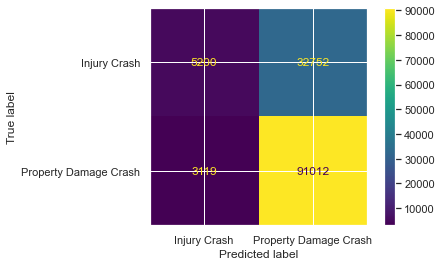

In [90]:
ConfusionMatrixDisplay.from_estimator(gcv_results_sec, X_test, y_test)
plt.show()

Here more number of True positive and False postive are predicted correctly. Now, we can say that this model can be chosen first among three algorithms. 

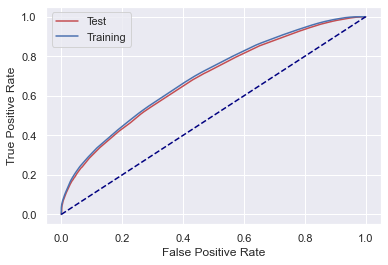

In [91]:
def generate_probs_dt(X, model = gcv_results_sec):
    return model.predict_proba(X)[:, 1]

def generate_roc_dt(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
y_test_roc = y_test.map({'Property Damage Crash': 1, 'Injury Crash': 0}).astype(int)
y_train_roc = y_train.map({'Property Damage Crash': 1, 'Injury Crash': 0}).astype(int)   
fpr_test, tpr_test = generate_roc_dt(y_test_roc, generate_probs_dt(X_test))
fpr_train, tpr_train = generate_roc_dt(y_train_roc, generate_probs_dt(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()



But there is a small thing to notice, that testing accuracy is bit low compared to training accuracy. It can be easily observed in the curve. 

In [92]:
#y_true = np.argmax(testdata, axis=0)
dt_data_score = gcv_results_sec.score(X_test, y_test)
print(f'Using only Decision Tree preprocesser: {dt_data_score:.2%}')

Using only Decision Tree preprocesser: 72.84%


In [93]:
from sklearn.metrics import roc_auc_score

dt_roc_auc = roc_auc_score(y_test, generate_probs_dt(X_test), multi_class = 'ovr')
dt_roc_auc

0.6836334796992667

After performing three algorithms, I felt the order of priority of implementation is Decision tree > Logistic Regression> Random forest. But we can't conclude yet. Now we will apply a new algorithm called Gradient Boosting. 

### Modeling with Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_pipeline = Pipeline([('data_processing', maryland_proc_pipeline),
             ('gbc', GradientBoostingClassifier())])

params = {'gbc__max_depth': [1,2,3],
         'gbc__n_estimators': [50, 100, 200]
         }

gb_gscv = GridSearchCV(gradient_boosting_pipeline, 
                       param_grid = params, cv = 5, 
                       scoring='accuracy', verbose = 10)
           
gb_gscv = gb_gscv.fit(X_train, y_train)

gb_gscv.best_estimator_


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START gbc__max_depth=1, gbc__n_estimators=50......................
[CV 1/5; 1/9] END gbc__max_depth=1, gbc__n_estimators=50;, score=0.722 total time=  13.7s
[CV 2/5; 1/9] START gbc__max_depth=1, gbc__n_estimators=50......................
[CV 2/5; 1/9] END gbc__max_depth=1, gbc__n_estimators=50;, score=0.722 total time=  13.5s
[CV 3/5; 1/9] START gbc__max_depth=1, gbc__n_estimators=50......................
[CV 3/5; 1/9] END gbc__max_depth=1, gbc__n_estimators=50;, score=0.723 total time=  13.5s
[CV 4/5; 1/9] START gbc__max_depth=1, gbc__n_estimators=50......................
[CV 4/5; 1/9] END gbc__max_depth=1, gbc__n_estimators=50;, score=0.723 total time=  13.5s
[CV 5/5; 1/9] START gbc__max_depth=1, gbc__n_estimators=50......................
[CV 5/5; 1/9] END gbc__max_depth=1, gbc__n_estimators=50;, score=0.722 total time=  13.6s
[CV 1/5; 2/9] START gbc__max_depth=1, gbc__n_estimators=100.....................
[CV 

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['ACC_DATE', 'DISTANCE',
                                                   'LOG_MILE', 'RTE_NO',
                                                   'YEAR']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                             

The best parameters after performing the model are n_estimators=200. Now, Secondary gridsearch is applied to check the best estimators and verify them.

#### secondary grid search

In [66]:
params = {'gbc__max_depth': [1,2,3],
         'gbc__n_estimators': [200, 250, 300]
         }
gb_gscv_secondary = GridSearchCV(gradient_boosting_pipeline, 
                       param_grid = params, cv = 5, 
                       scoring='accuracy', verbose = 10)
           
gb_gscv_secondary = gb_gscv_secondary.fit(X_train, y_train)

gb_gscv_secondary.best_estimator_


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START gbc__max_depth=1, gbc__n_estimators=200.....................
[CV 1/5; 1/9] END gbc__max_depth=1, gbc__n_estimators=200;, score=0.726 total time=  44.5s
[CV 2/5; 1/9] START gbc__max_depth=1, gbc__n_estimators=200.....................
[CV 2/5; 1/9] END gbc__max_depth=1, gbc__n_estimators=200;, score=0.726 total time=  43.6s
[CV 3/5; 1/9] START gbc__max_depth=1, gbc__n_estimators=200.....................
[CV 3/5; 1/9] END gbc__max_depth=1, gbc__n_estimators=200;, score=0.727 total time=  43.7s
[CV 4/5; 1/9] START gbc__max_depth=1, gbc__n_estimators=200.....................
[CV 4/5; 1/9] END gbc__max_depth=1, gbc__n_estimators=200;, score=0.727 total time=  44.5s
[CV 5/5; 1/9] START gbc__max_depth=1, gbc__n_estimators=200.....................
[CV 5/5; 1/9] END gbc__max_depth=1, gbc__n_estimators=200;, score=0.726 total time=  44.4s
[CV 1/5; 2/9] START gbc__max_depth=1, gbc__n_estimators=250.....................

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['ACC_DATE', 'DISTANCE',
                                                   'LOG_MILE', 'RTE_NO',
                                                   'YEAR']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                             

After performing secondary GSC, the best parameters are changed they are n_estimators=300. Hence these parameters are used for classification report, accuracy and confusion matrix.

In [67]:
y_hatgb = gb_gscv_secondary.predict(X_test)
print(classification_report(y_test, y_hatgb))

                       precision    recall  f1-score   support

         Injury Crash       0.65      0.14      0.23     37952
Property Damage Crash       0.74      0.97      0.84     94131

             accuracy                           0.73    132083
            macro avg       0.69      0.55      0.53    132083
         weighted avg       0.71      0.73      0.66    132083



This model is performing better than all the algorithms. This is giving 73% accuracy and precision, recall, f1-score are good compared to other algorithms. In the next steps the accuracy is stored in the list and confusion matrix is plotted. 

In [108]:
acc = accuracy_score(y_test,y_hatgb)
accuracy_list.append(acc)

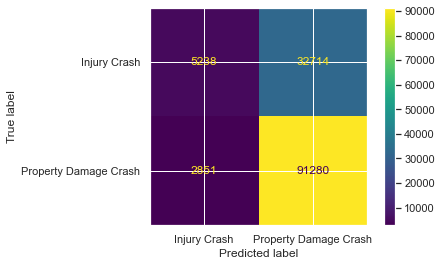

In [69]:
ConfusionMatrixDisplay.from_estimator(gb_gscv_secondary, X_test, y_test)
plt.show()

Here more number of True positive and False postive are predicted correctly. Now, we can say that this model can be chosen among all four algorithms.

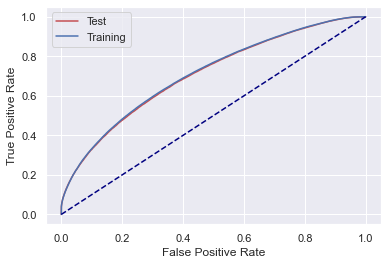

In [70]:
def generate_probs_gb(X, model = gb_gscv_secondary):
    return model.predict_proba(X)[:, 1]

def generate_roc_gb(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
y_test_roc = y_test.map({'Property Damage Crash': 1, 'Injury Crash': 0}).astype(int)
y_train_roc = y_train.map({'Property Damage Crash': 1, 'Injury Crash': 0}).astype(int)   
fpr_test, tpr_test = generate_roc_gb(y_test_roc, generate_probs_gb(X_test))
fpr_train, tpr_train = generate_roc_gb(y_train_roc, generate_probs_gb(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()



The roc_curve is also better, because, it is showing same values for both training testing scores. 

In [71]:
print(f'Validation score: {gb_gscv_secondary.best_score_:.2%}')

gb_pred = gb_gscv_secondary.predict(X_test)

print(f'Test score: {gb_gscv_secondary.score(X_test, y_test):.2%}')

Validation score: 73.23%
Test score: 73.07%


In [72]:
from sklearn.metrics import roc_auc_score

dt_roc_auc = roc_auc_score(y_test, generate_probs_gb(X_test), multi_class = 'ovr')
dt_roc_auc

0.7063497010263834

From above all statements we can say that Gradient boosting is performing best compared to other 3 algorithms. The area under roc is more for this model

### Modeling with Ensemble learning

This model is implemented with the best parameters of all the four algorithms and calculated the area under roc_auc 

In [75]:
#https://github.com/appliedecon/data602-lectures/blob/main/ensembles/ensembles.ipynb

clf1 = LogisticRegression(penalty = 'l2', C = 10, solver = 'lbfgs', random_state = 0)
clf2 = RandomForestClassifier(max_depth = 12, max_samples = 5000, n_estimators = 50)
clf3 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5,
                              min_samples_split = 40, criterion = 'entropy', random_state = 1)
clf4 = GradientBoostingClassifier(n_estimators=200)

pipe1 = Pipeline([('data_processing', maryland_proc_pipeline),('logreg', clf1)])
pipe2 = Pipeline([('data_processing', maryland_proc_pipeline),('rf', clf2)])
pipe3 = Pipeline([('data_processing', maryland_proc_pipeline),('dt', clf3)])
pipe4 = Pipeline([('data_processing', maryland_proc_pipeline),('gb', clf4)])

labs = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gradient Boost']
clfs = [pipe1, pipe2, pipe3, pipe4]
clfs = zip(labs, clfs)

for lab, clf in clfs:
    scores = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 5, scoring='roc_auc')
    print(f'ROC AUC {scores.mean():.2f} (+/- {scores.std():.2f}) [{lab}]')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.690) total time=  10.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


[CV] END ................................ score: (test=0.693) total time=   9.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.1s remaining:    0.0s


[CV] END ................................ score: (test=0.693) total time=   9.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   29.2s remaining:    0.0s


[CV] END ................................ score: (test=0.692) total time=   9.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   38.4s remaining:    0.0s


[CV] END ................................ score: (test=0.691) total time=   8.8s
ROC AUC 0.69 (+/- 0.00) [Logistic Regression]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   47.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   47.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.674) total time=   6.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV] END ................................ score: (test=0.675) total time=   6.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.8s remaining:    0.0s


[CV] END ................................ score: (test=0.674) total time=   6.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.1s remaining:    0.0s


[CV] END ................................ score: (test=0.672) total time=   6.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   25.4s remaining:    0.0s


[CV] END ................................ score: (test=0.677) total time=   6.0s
ROC AUC 0.67 (+/- 0.00) [Random Forest]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   31.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   31.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.671) total time=   8.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


[CV] END ................................ score: (test=0.672) total time=   8.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.9s remaining:    0.0s


[CV] END ................................ score: (test=0.674) total time=   8.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   25.1s remaining:    0.0s


[CV] END ................................ score: (test=0.674) total time=   8.5s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   33.6s remaining:    0.0s


[CV] END ................................ score: (test=0.672) total time=   8.4s
ROC AUC 0.67 (+/- 0.00) [Decision Tree]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   42.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   42.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.702) total time= 1.8min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV] END ................................ score: (test=0.703) total time= 1.8min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.7min remaining:    0.0s


[CV] END ................................ score: (test=0.706) total time= 1.9min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.5min remaining:    0.0s


[CV] END ................................ score: (test=0.704) total time= 1.8min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  7.4min remaining:    0.0s


[CV] END ................................ score: (test=0.703) total time= 1.8min
ROC AUC 0.70 (+/- 0.00) [Gradient Boost]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.2min finished


In [76]:
ems = [('lr', pipe1),('rf', pipe2),('dt', pipe3),('gb', pipe4)]
clf5 = VotingClassifier(estimators = ems, weights = None, voting = 'soft')

scores = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 5, scoring='roc_auc', verbose = 10)
print(f'ROC AUC {scores.mean():.2f} (+/- {scores.std():.2f}) [Ensemble]')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.699) total time= 2.2min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV] END ................................ score: (test=0.701) total time= 2.2min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.4min remaining:    0.0s


[CV] END ................................ score: (test=0.703) total time= 5.3min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  9.7min remaining:    0.0s


[CV] END ................................ score: (test=0.702) total time= 2.2min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 11.8min remaining:    0.0s


[CV] END ................................ score: (test=0.700) total time= 2.2min
ROC AUC 0.70 (+/- 0.00) [Ensemble]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 14.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 14.0min finished


From this we can say that ensemble voting classifier is also getting same roc_auc area with gradient boosting. 

### Visualizing the accuracy of the algorithms

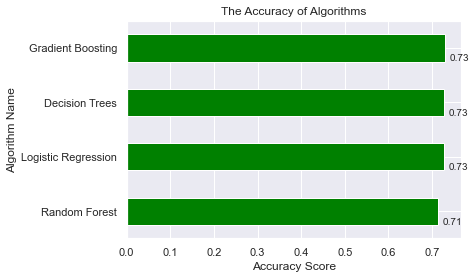

In [109]:
# Visualize the accuracy of the algorithms

# Add the y ticks
y_ticks = np.arange(len(algorithm_list))
# Convert the lists we created before to a dataframe
df_acc = pd.DataFrame(list(zip(algorithm_list, accuracy_list)), 
                      columns = ['Algorithm Name','Accuracy Score']).sort_values(by = ['Accuracy Score'], ascending = True)
# Create the plot
ax = df_acc.plot.barh('Algorithm Name', 'Accuracy Score', align = 'center', legend = False, colormap='ocean')
for i in ax.patches:
    ax.text(i.get_width()+0.01, i.get_y()+0.01, str(round(i.get_width(), 2)), fontsize = 10)

# Add labels 
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm Name'], rotation = 0)
plt.title('The Accuracy of Algorithms')
plt.show()

### Conclusions:
Finally, visualized the accuracy of all algorithms using bar plot. From the graph, we can observe Gradient Boosting is performed best among remaining algorithms. Random Forest algorithm is performed least. 
The accuracy of the Gradient Boosting algorithm is about 73%.
The accuracy of the Decision Tree algorithm is about 72.7%.
The accuracy of the logistic regression algorithm is about 72.2%.
The accuracy of the random forest algorithm is about 71%.   

When using KNN, SVM, these models are taking hours to run and execute, Hence I didnt used for the final working. These models are working better. 
With these predictions, the insurance companies can work on the exact case based on the type of case.

References:
https://python-visualization.github.io/folium/modules.html  \
https://github.com/appliedecon/data602-lectures  \
https://github.com/krissylee/data_601_final_project/blob/main/Analysis_Demo.ipynb
